In [114]:
import talib
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
%matplotlib inline

df=a["XRT"]
df_ohlc= df
df_volume=df['Volume']
df_morning = df["morning_star"]
df_engulfing = df["engulfing"]
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

ax1=plt.subplot2grid((12,1), (0,0), rowspan=9, colspan=1)
ax2=plt.subplot2grid((12,1), (9,0), rowspan=1, colspan=1 , sharex=ax1)
ax3=plt.subplot2grid((12,1), (10,0), rowspan=1, colspan=1 , sharex=ax1)
ax4=plt.subplot2grid((12,1), (11,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values, width=1, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
ax3.fill_between(df_morning.index.map(mdates.date2num),df_morning.values,0)
ax4.fill_between(df_engulfing.index.map(mdates.date2num),df_engulfing.values,0)
plt.figure(figsize=(20,12))
plt.show()

print(morning_star[morning_star != 0])

print(engulfing[engulfing != 0])

In [2]:
import bs4 as bs
import pickle
import requests
def save_tickers():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup=bs.BeautifulSoup(resp.text)
    table=soup.find('table',{'class':'wikitable sortable'})
    tickers=[]
    for row in table.findAll('tr')[1:]:
        ticker=row.findAll('td')[0].text[:-1]
        tickers.append(ticker)
    with open("tickers.pickle",'wb') as f:
        pickle.dump(tickers, f)
    return tickers
List_tickers = save_tickers()

In [54]:
from pandas_datareader import data as pdr
all_symbols = pdr.get_nasdaq_symbols()

In [57]:
NASDAQ_ticker = all_symbols.index.tolist()

In [58]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = NASDAQ_ticker,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "90d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  10047 of 10047 completed

900 Failed downloads:
- PMT$A: No data found, symbol may be delisted
- SPNV.W: No data found, symbol may be delisted
- FCAX.U: No data found, symbol may be delisted
- PRIF$D: No data found, symbol may be delisted
- SBG.U: No data found, symbol may be delisted
- MS$F: No data found, symbol may be delisted
- STT$D: No data found, symbol may be delisted
- USB$Q: No data found, symbol may be delisted
- PRIF$C: No data found, symbol may be delisted
- AGM$E: No data found, symbol may be delisted
- NGA.U: No data found, symbol may be delisted
- BAC$A: No data found, symbol may be delisted
- USB$H: No data found, symbol may be delisted
- SLG$I: No data found, symbol may be delisted
- WFC$O: No data found, symbol may be delisted
- SPGS.U: No data found, symbol may be delisted
- IPVA.U: No data found, symbol may be delisted
- NYCB$A: No data found, symbol may be delisted
- CIO$A: No data found, symbol may be delisted
-

In [59]:
df_morning = yf.Ticker("GME").history(period="90d")

In [60]:
df_morning.drop(['Open','High','Low',"Close",'Volume', 'Dividends', 'Stock Splits'],axis=1,inplace=True)

In [61]:
for i in List_tickers:
    try:
        morning_star = talib.CDLMORNINGSTAR(data[i]["Open"], data[i]["High"], data[i]["Low"], data[i]["Close"])
        df_morning[i] = morning_star
    except:
        continue

In [155]:
Series_Morning = df_morning.iloc[-7:].sum() != 0
list_morning = Series_Morning[Series_Morning == True].index.tolist()

In [156]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = list_morning,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  15 of 15 completed


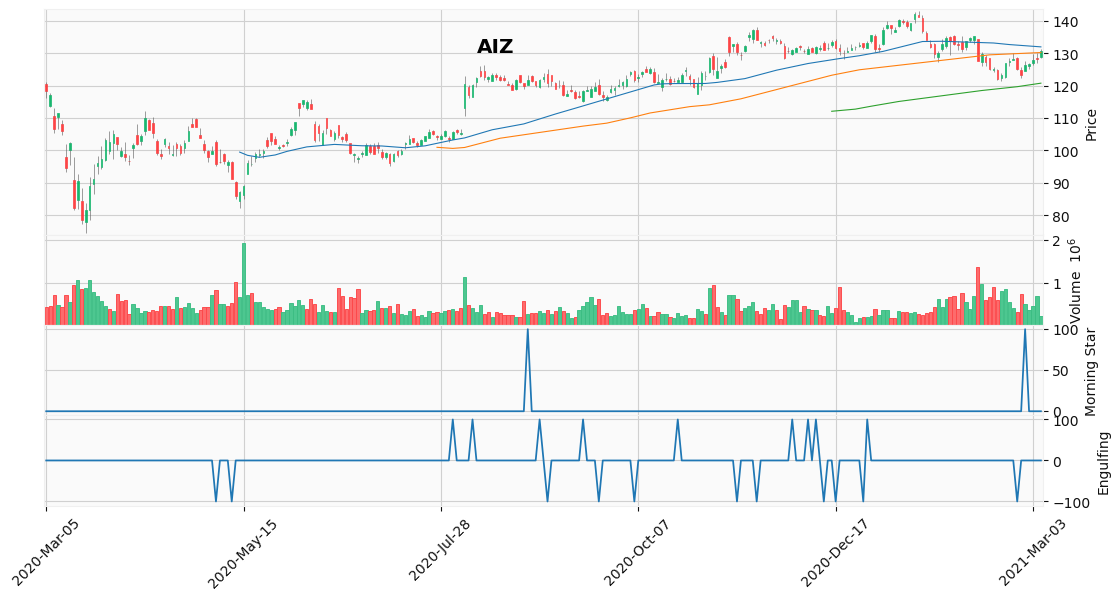

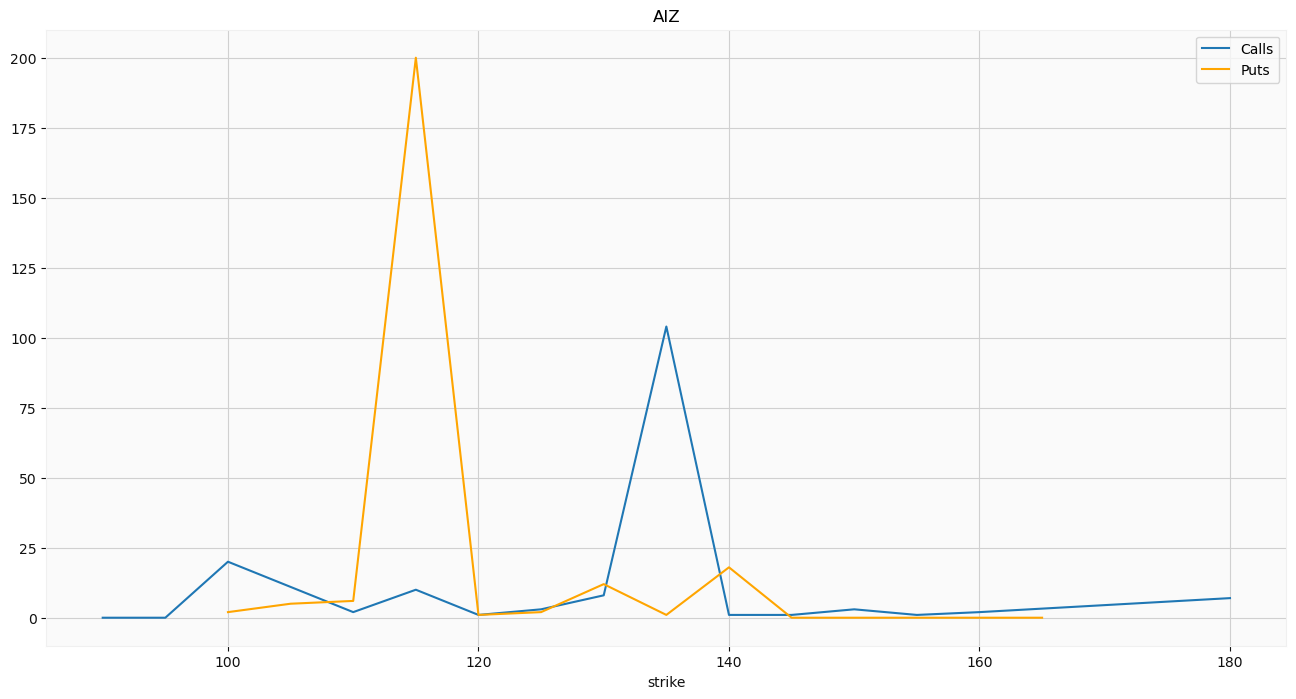

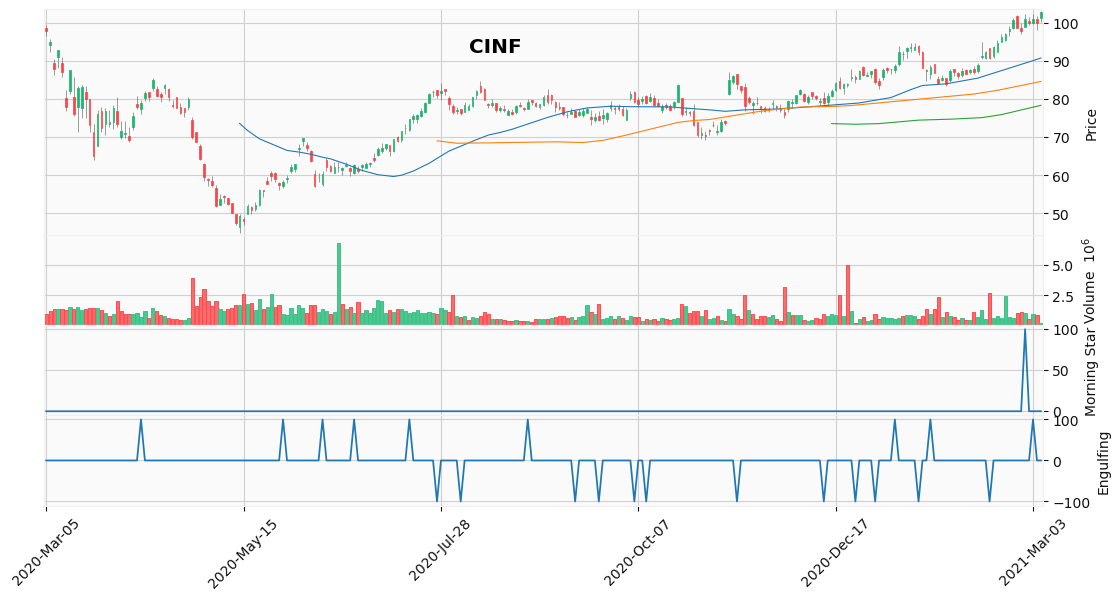

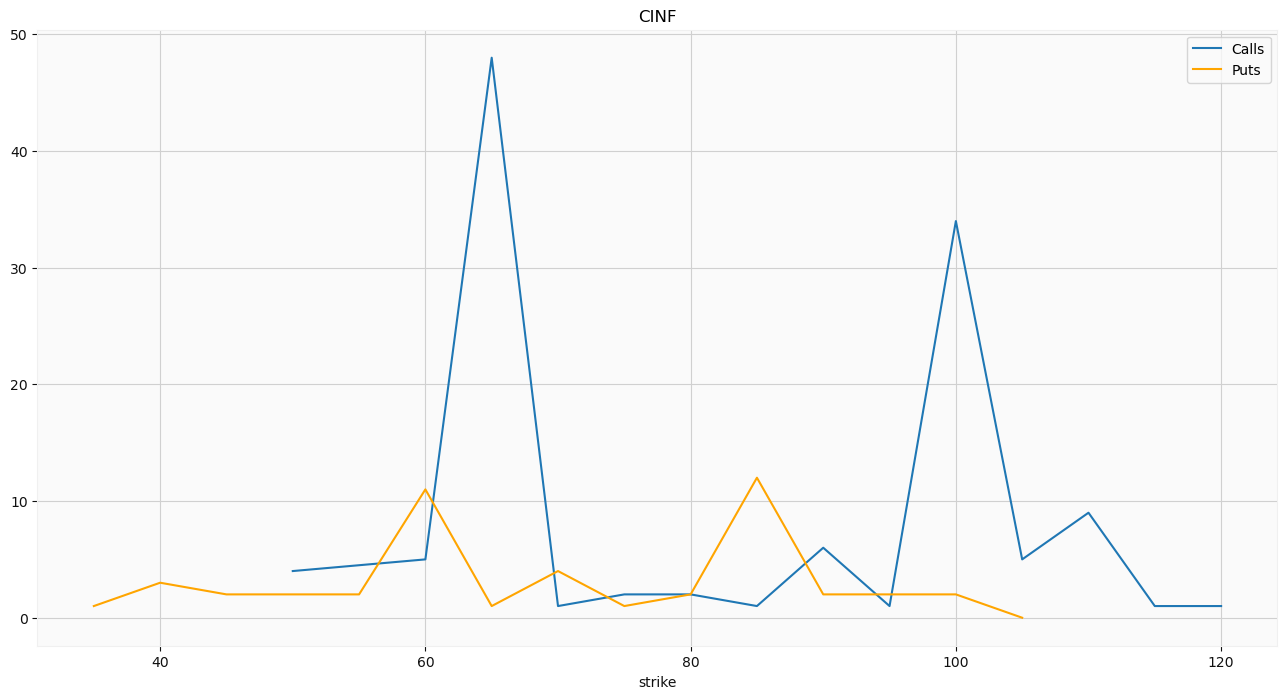

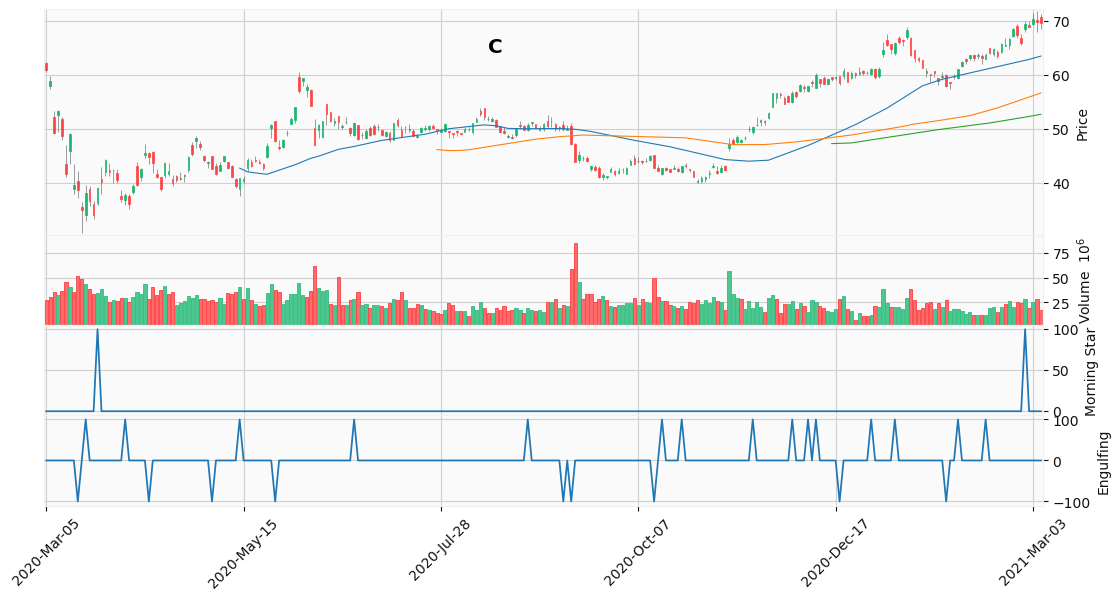

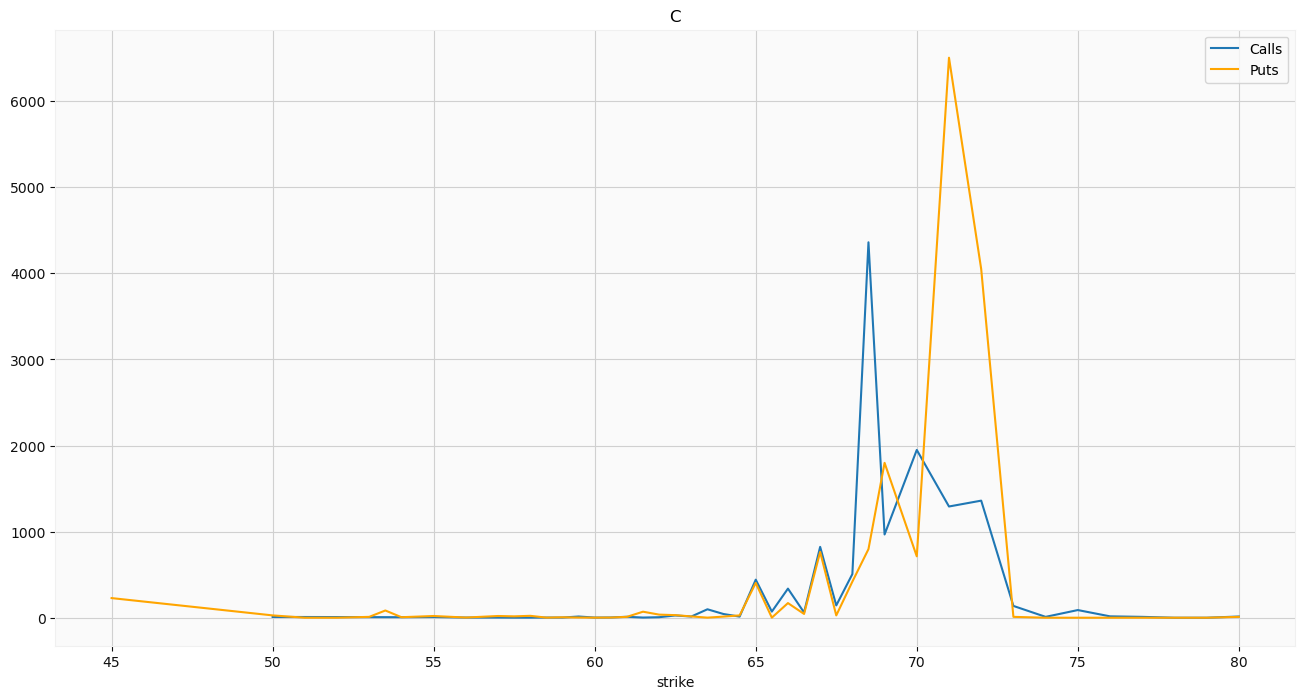

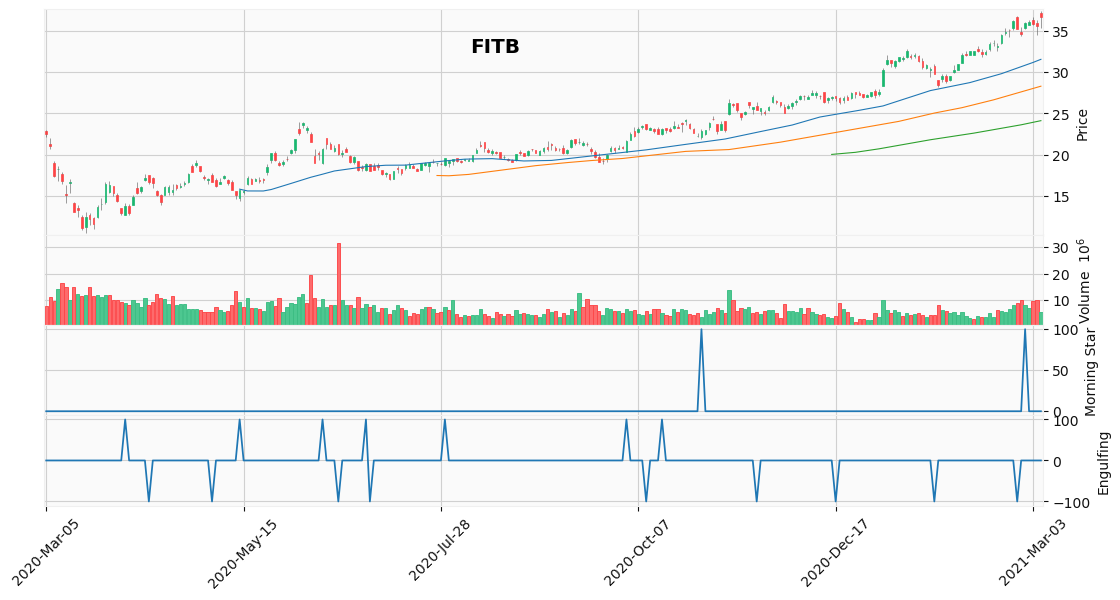

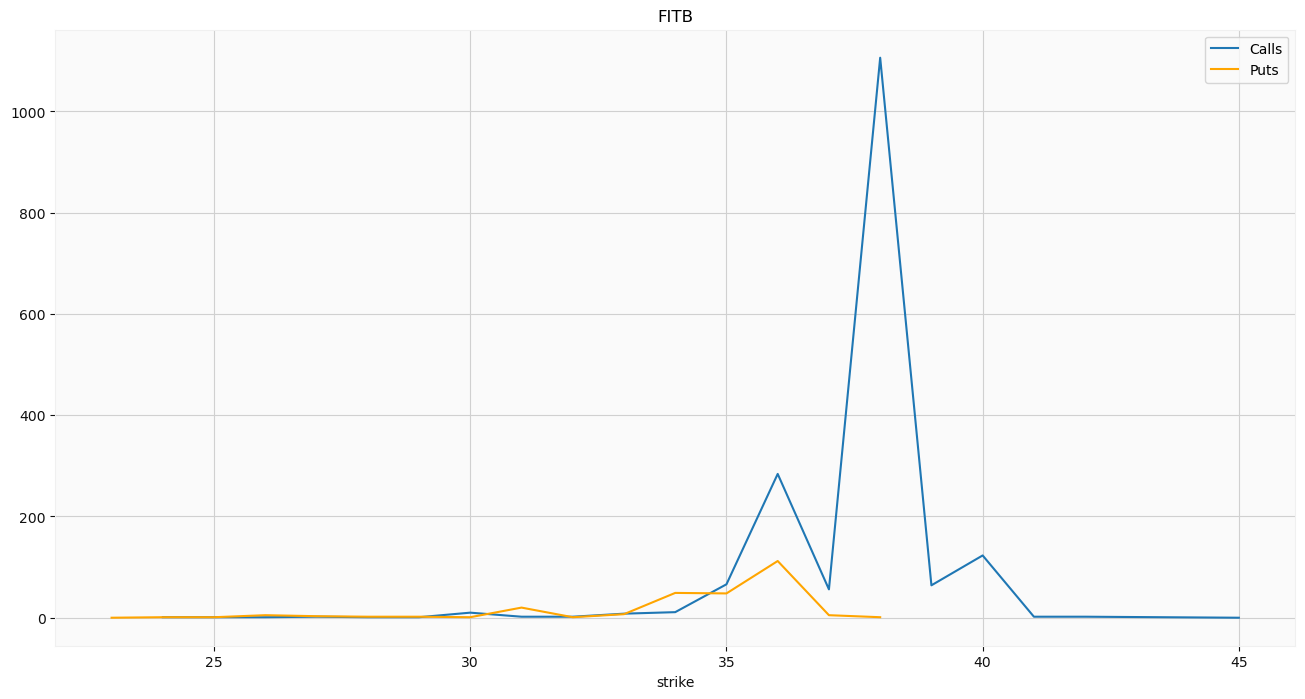

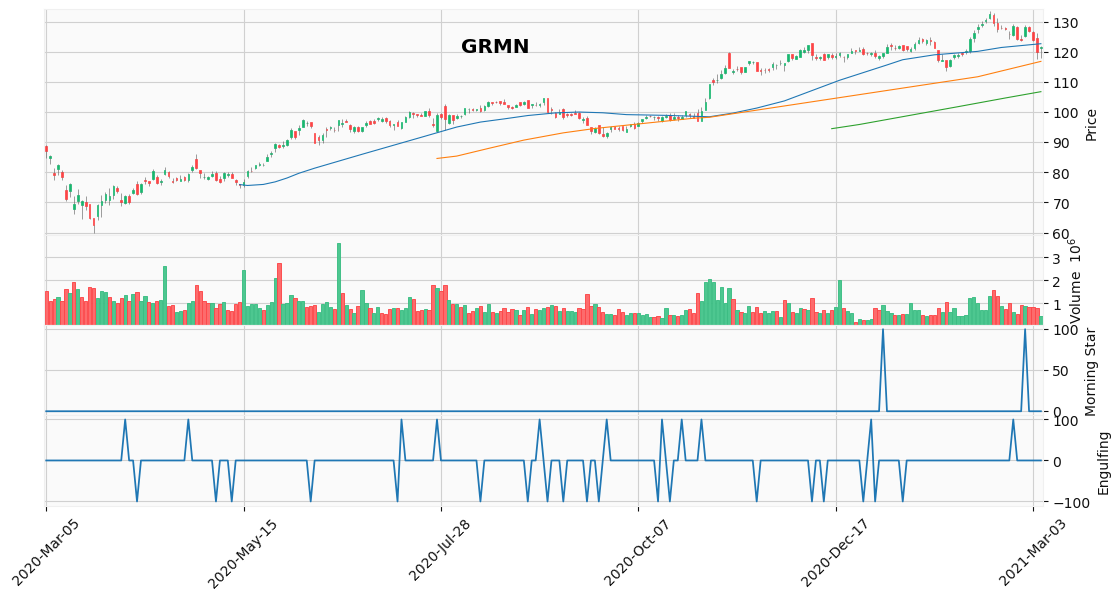

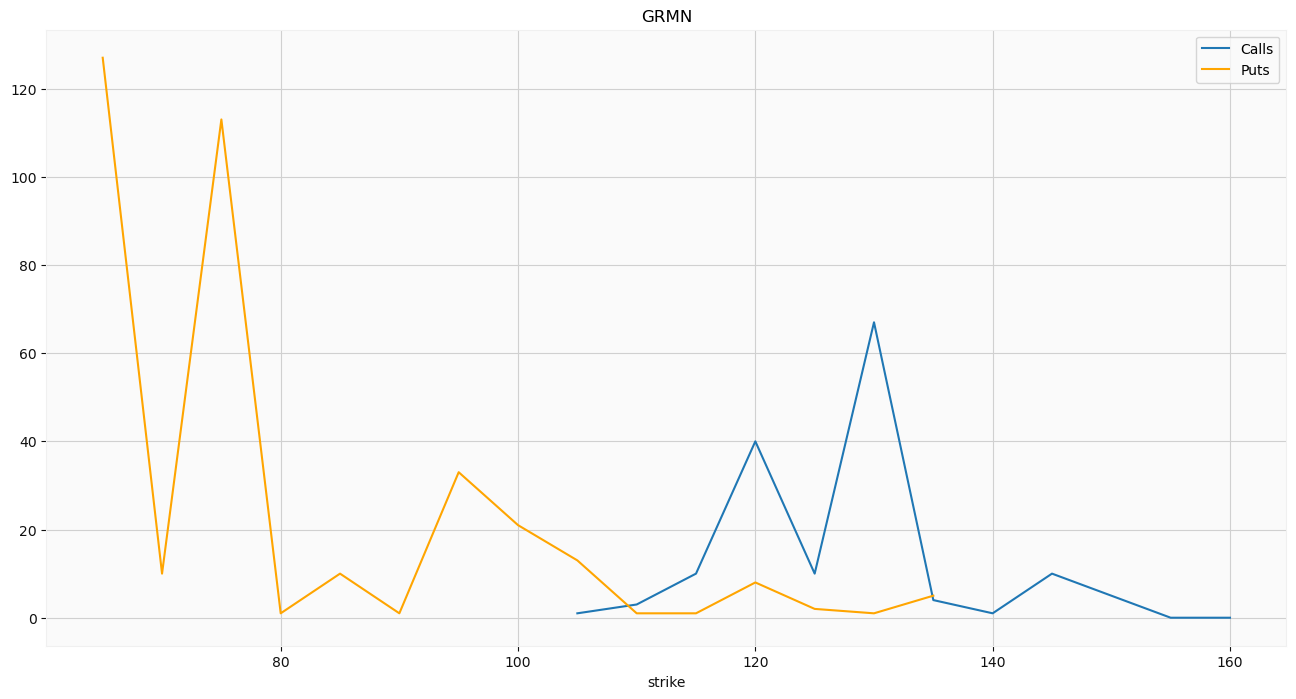

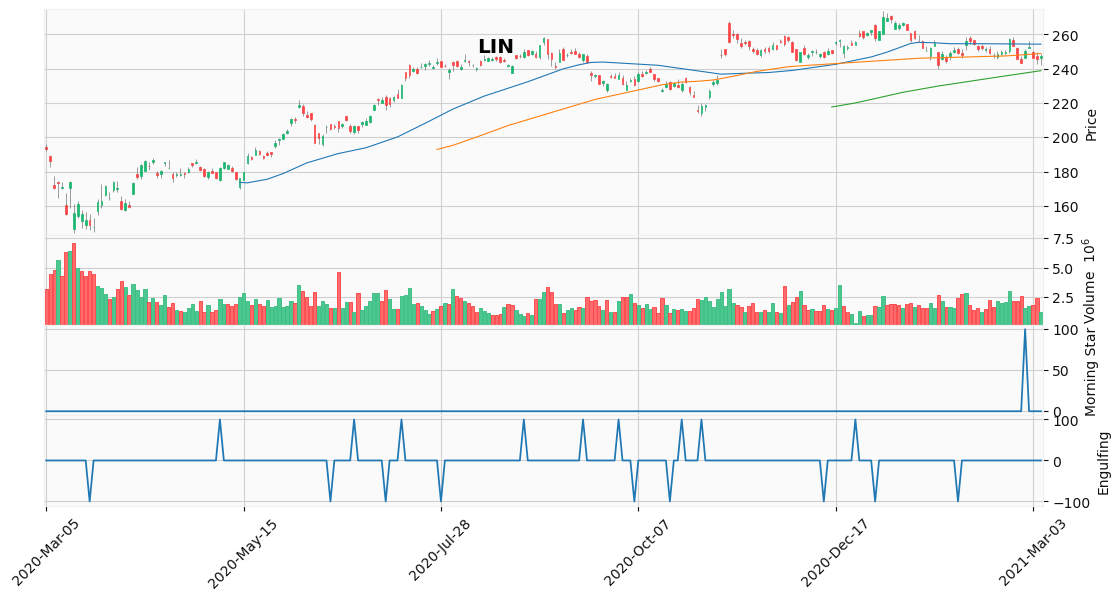

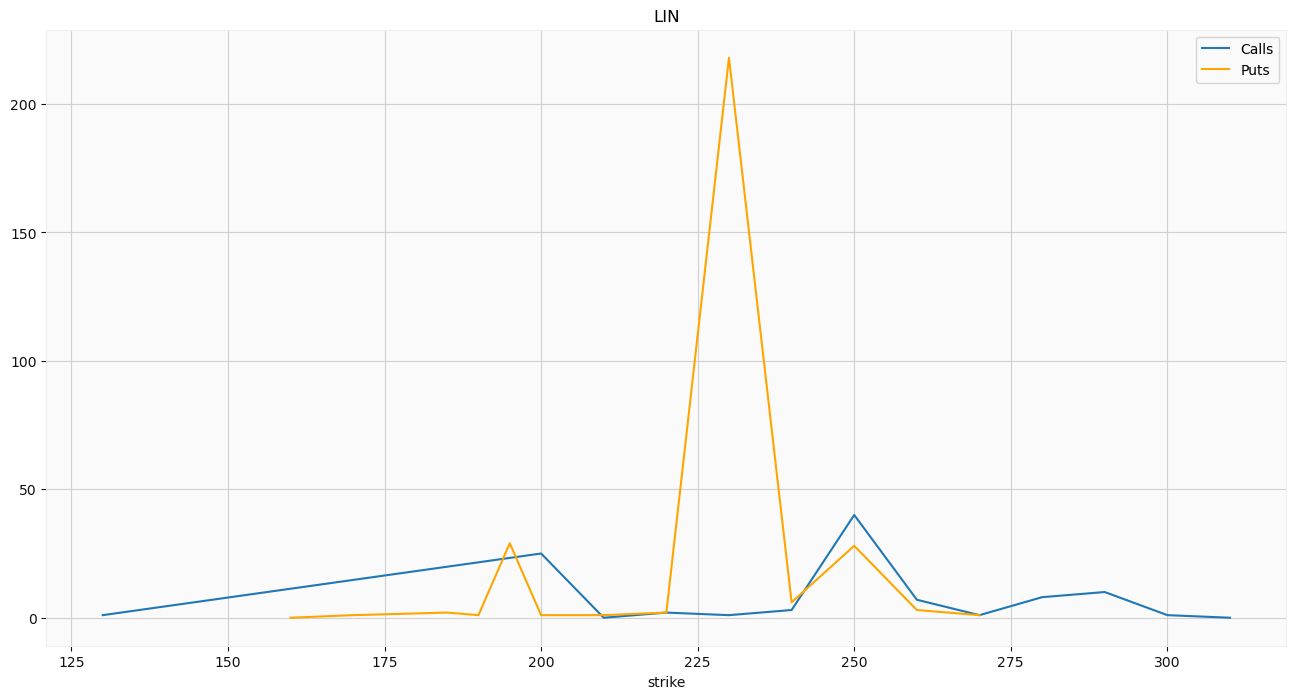

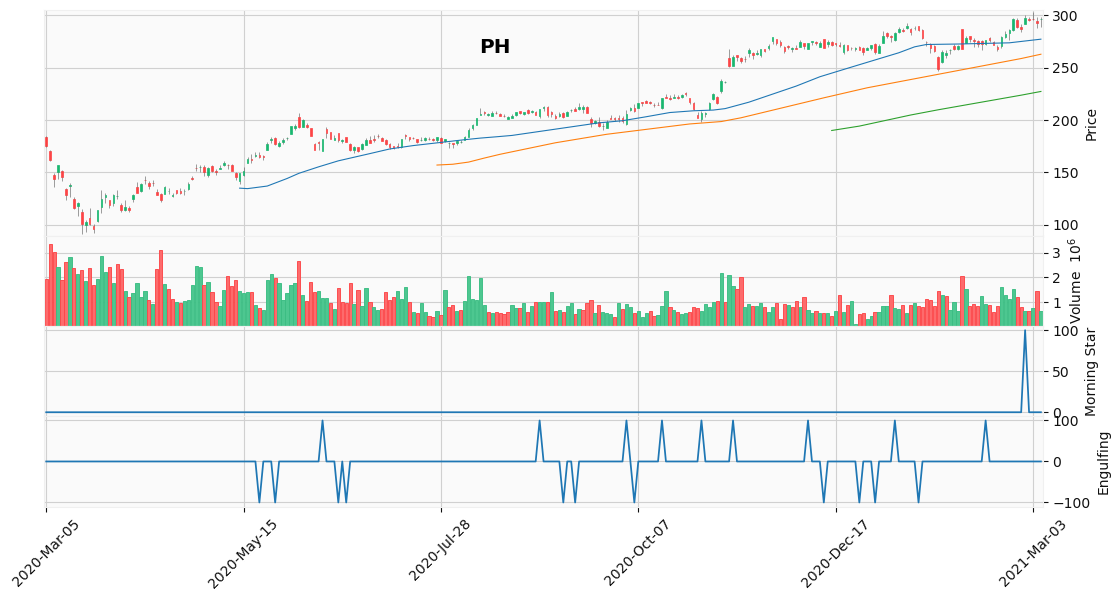

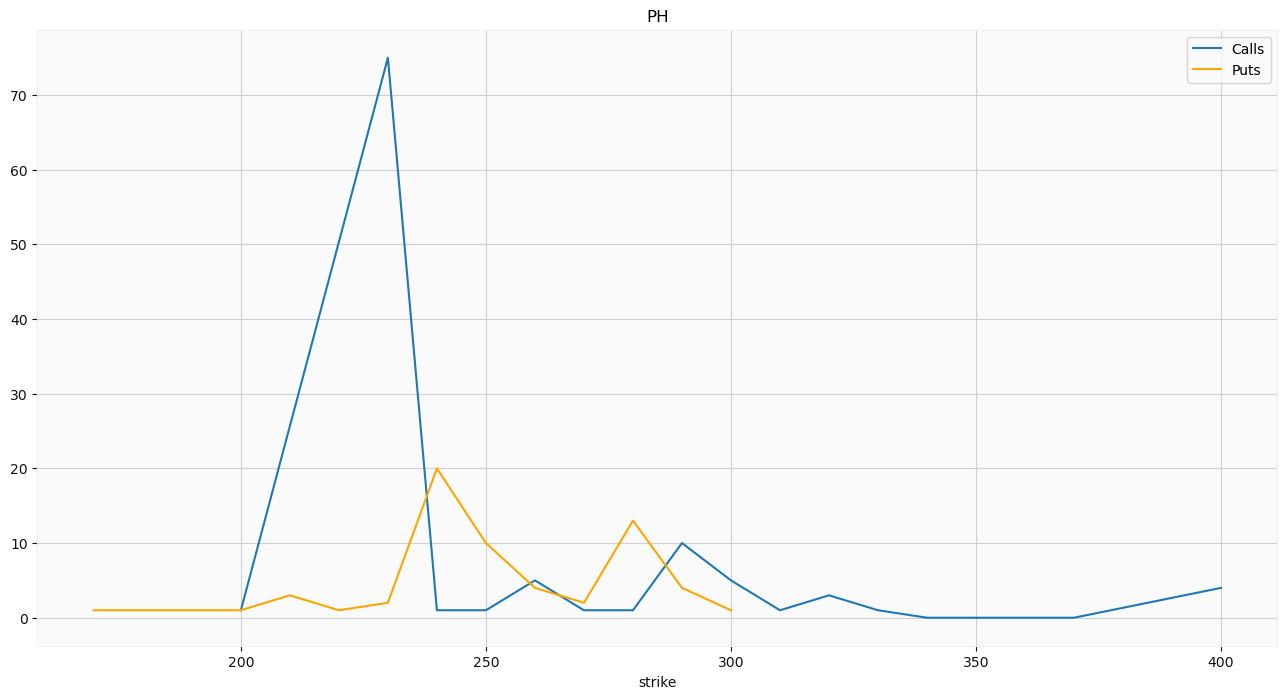

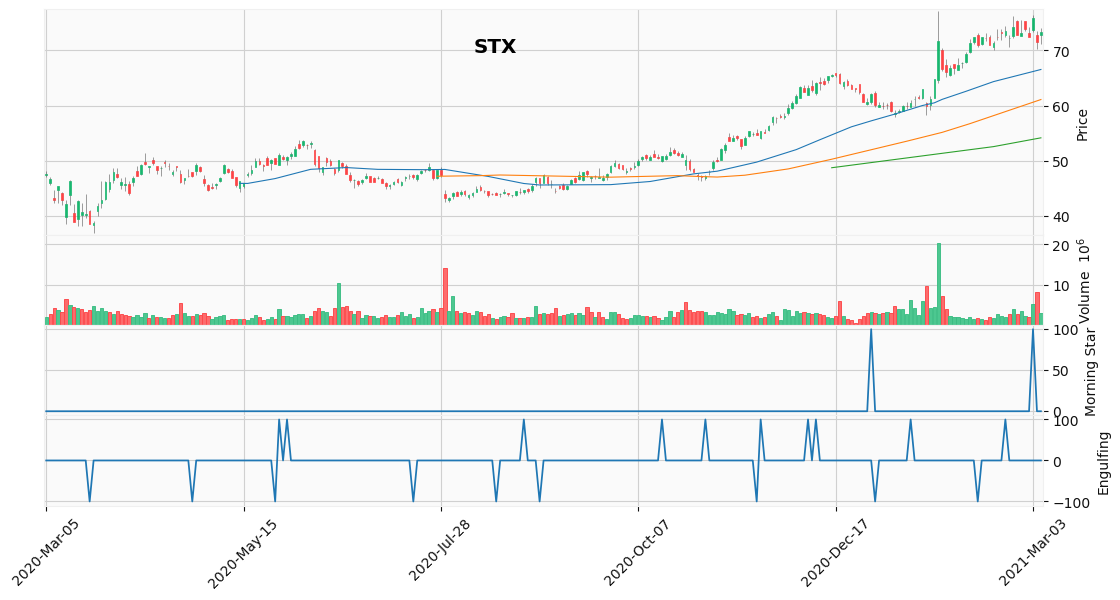

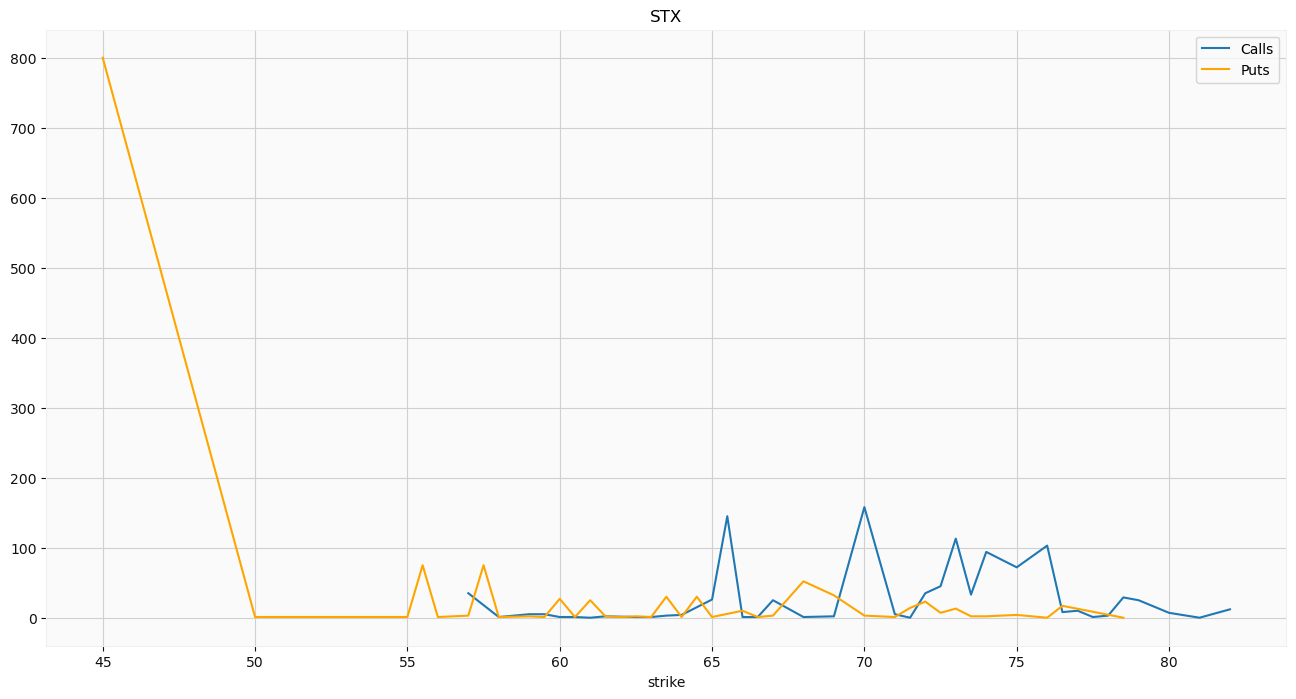

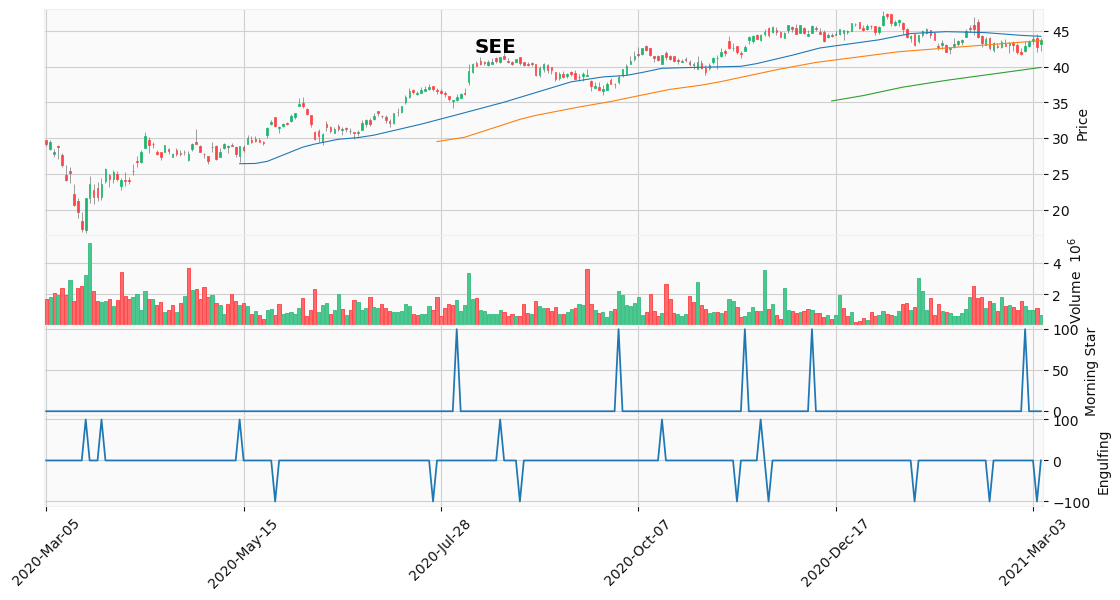

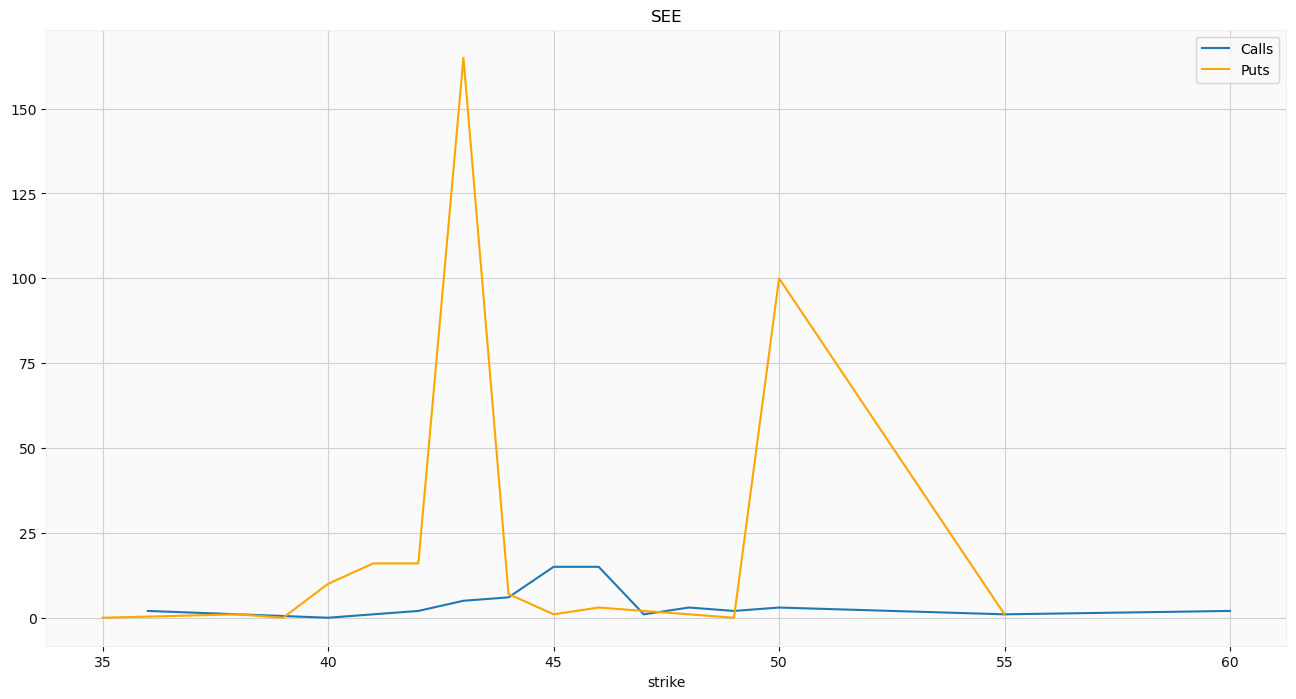

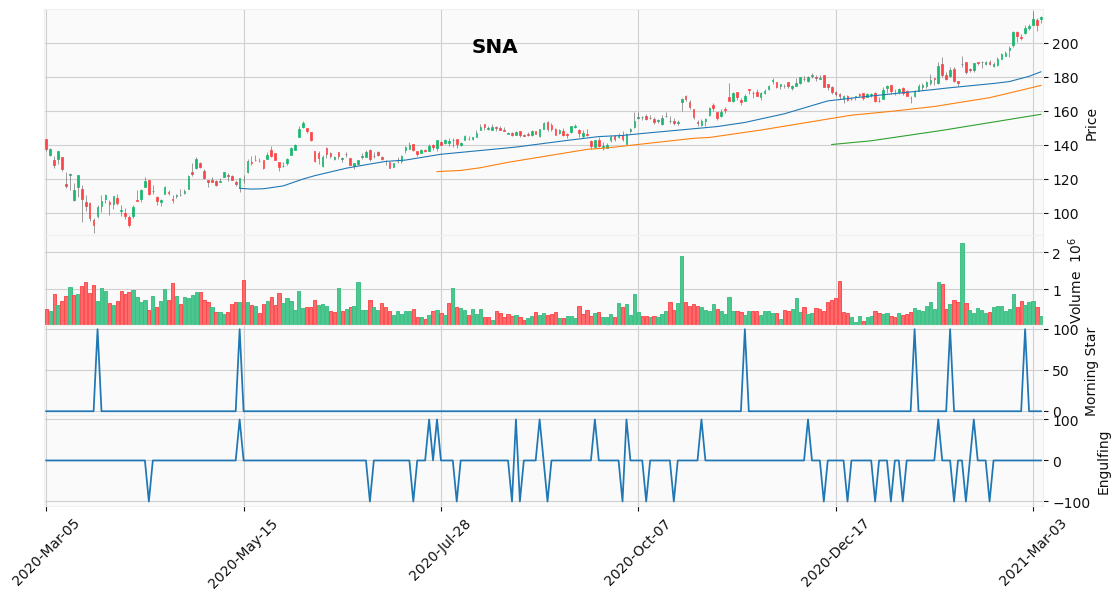

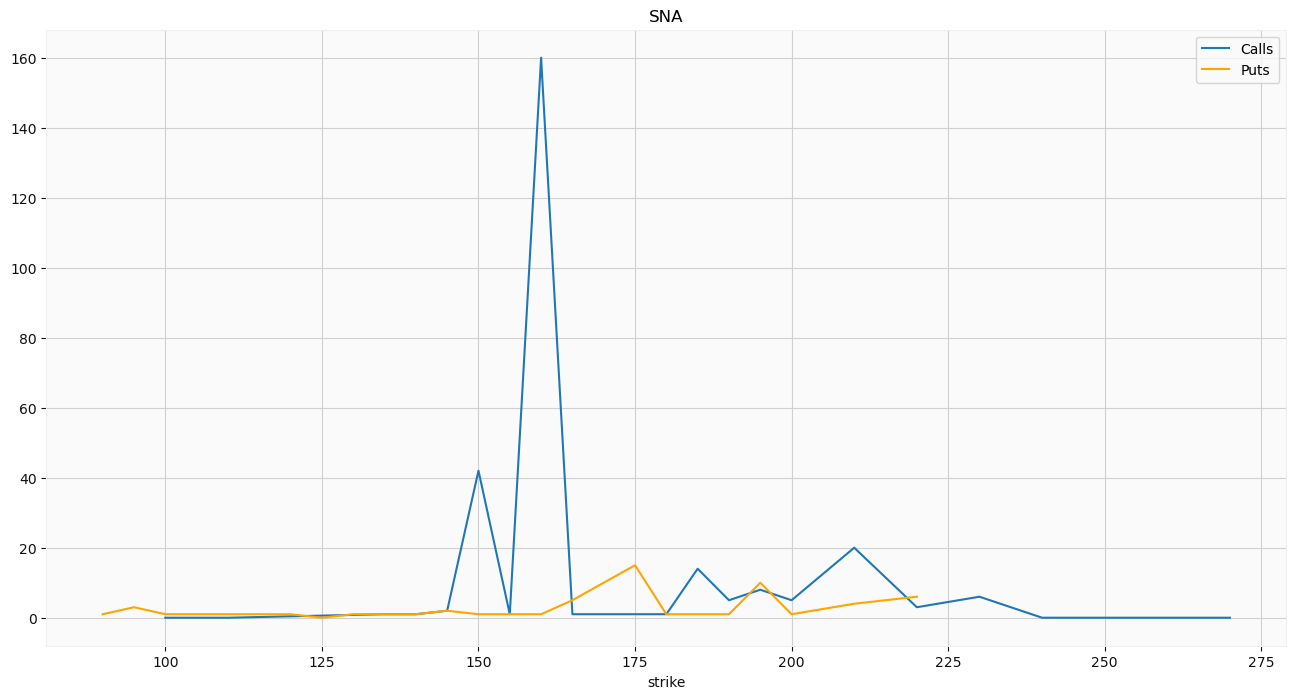

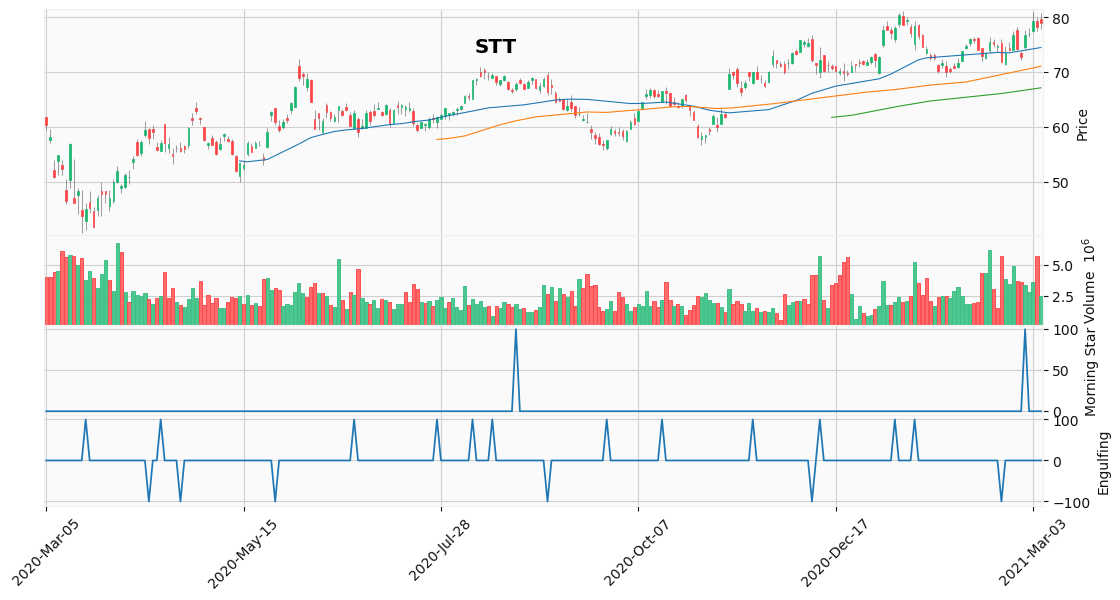

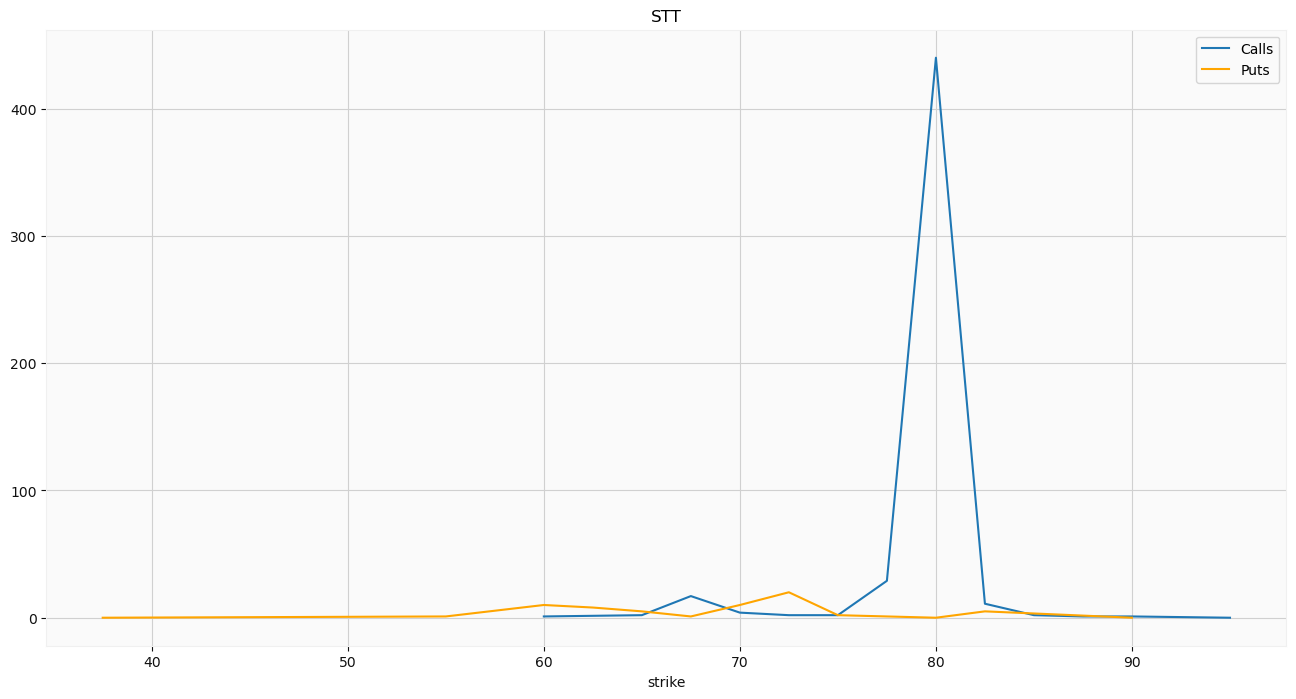

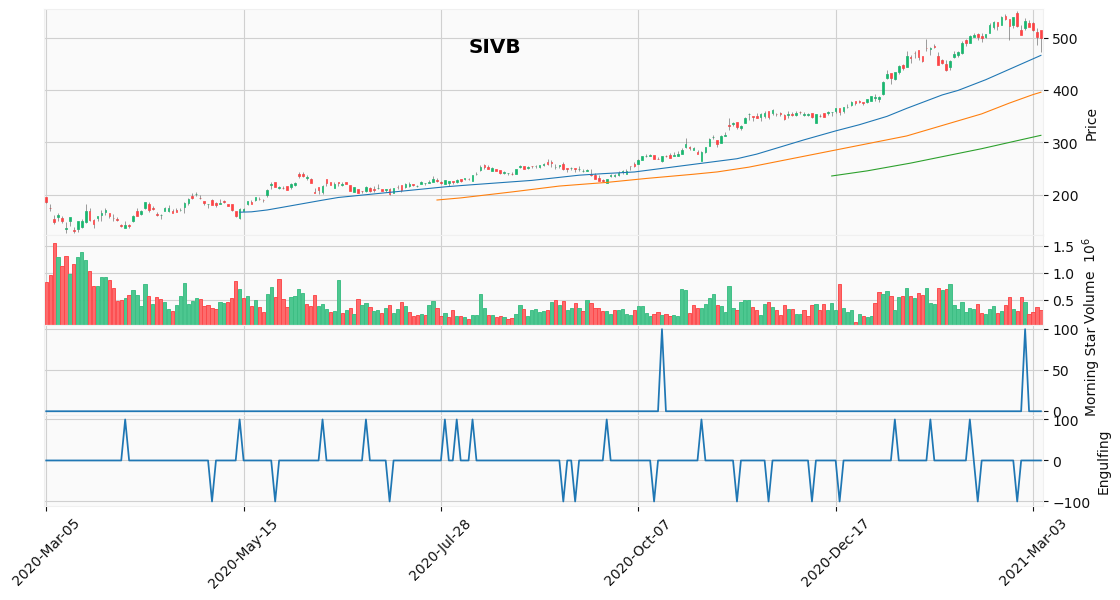

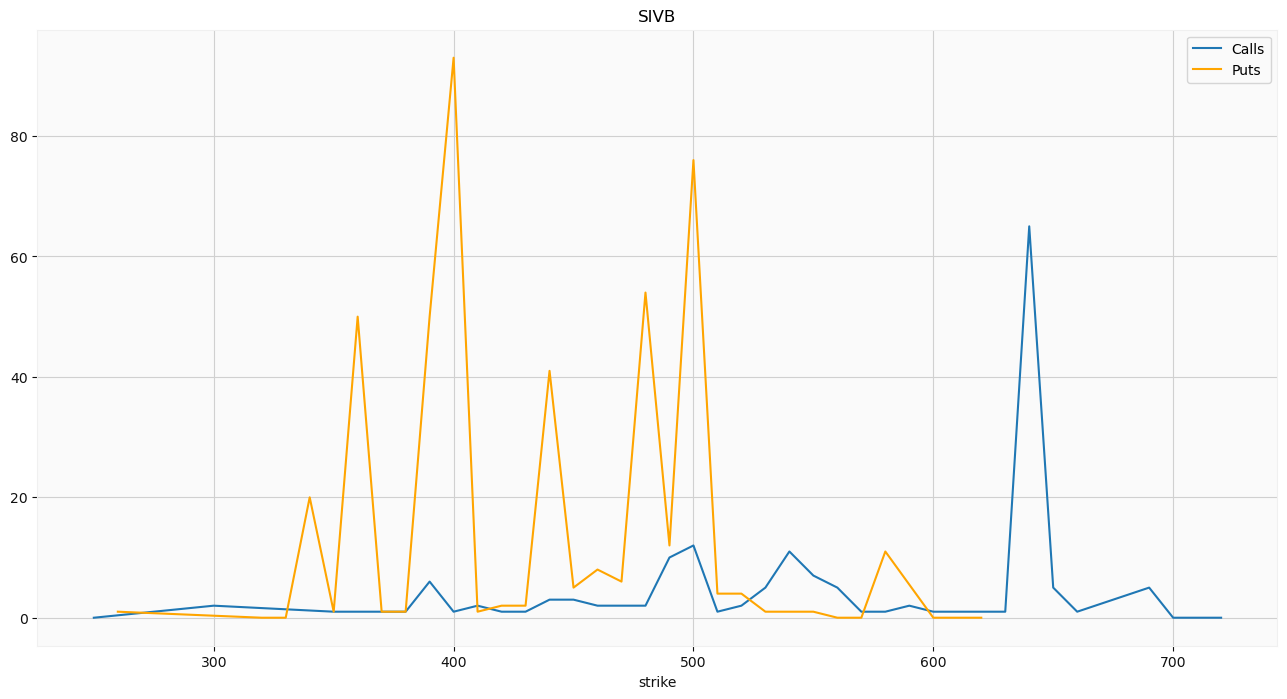

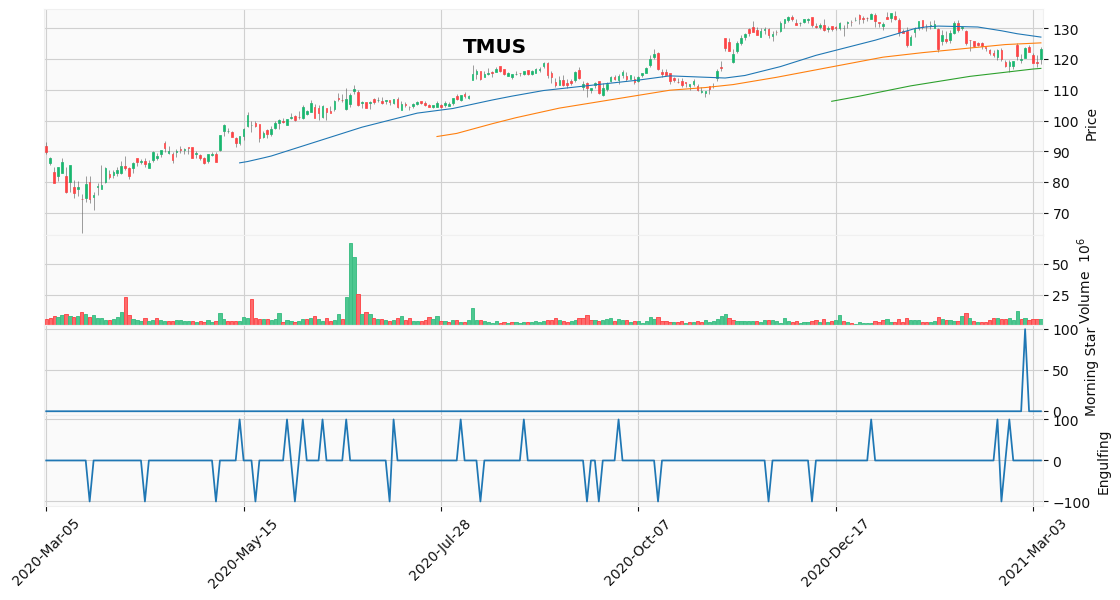

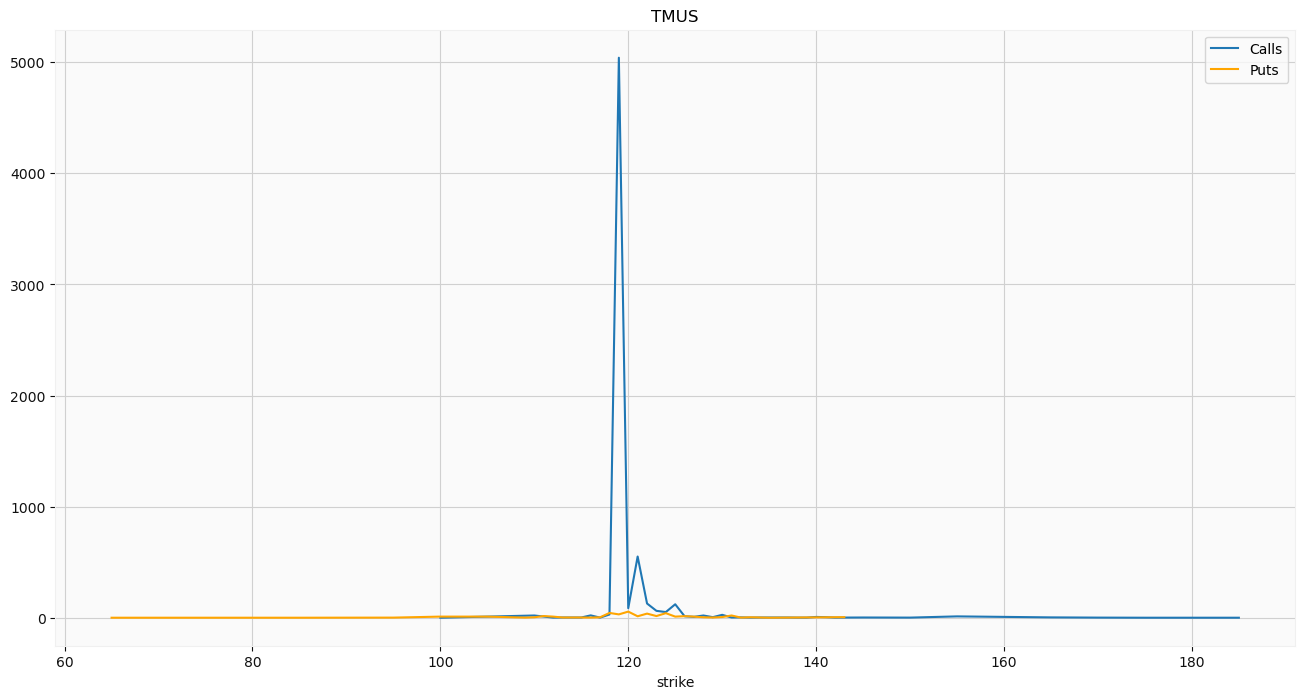

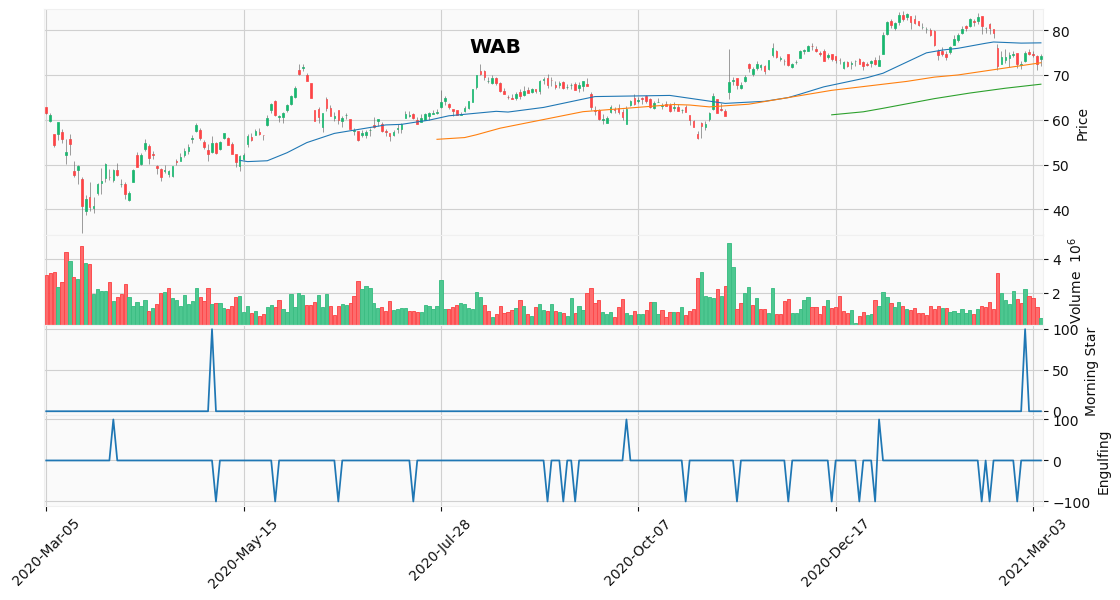

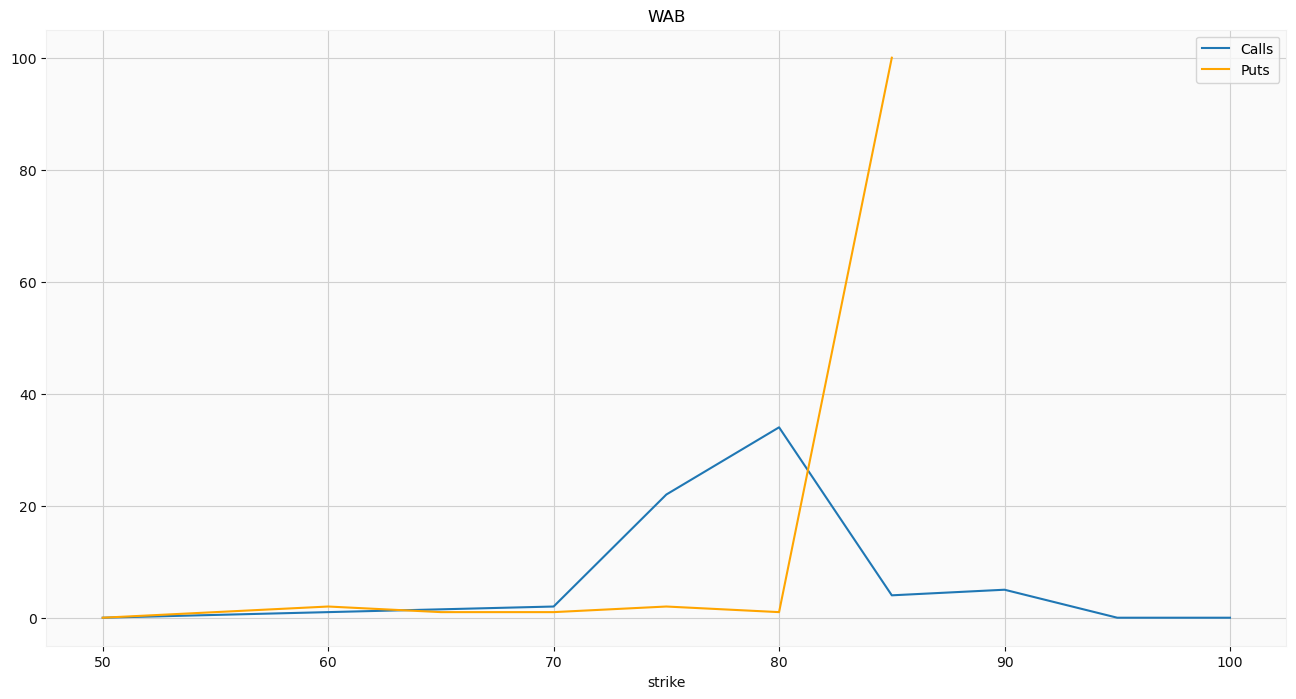

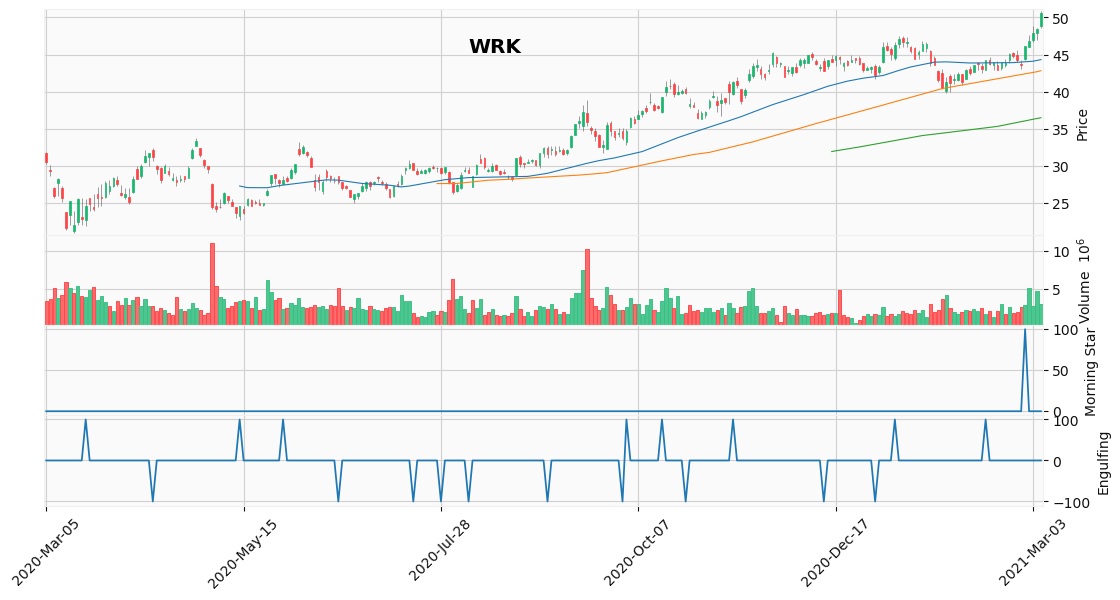

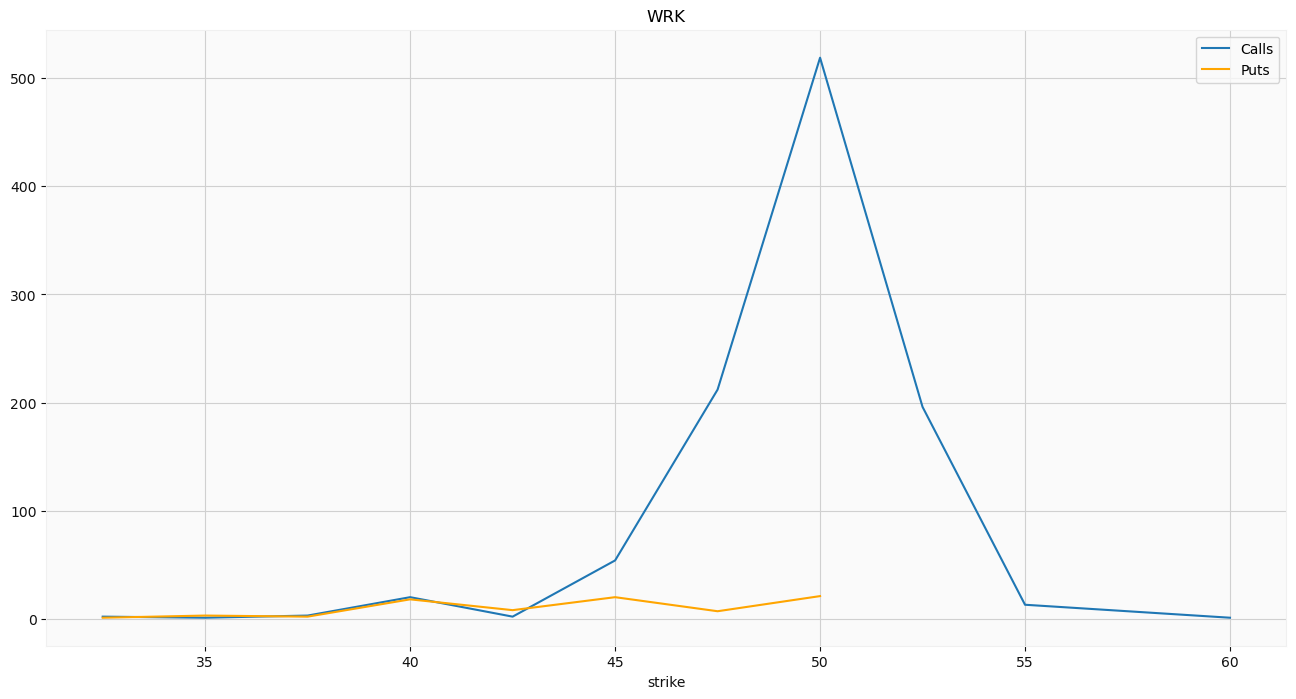

In [161]:
for i in list_morning:
    morning_star = talib.CDLMORNINGSTAR(data[i]["Open"], data[i]["High"], data[i]["Low"], data[i]["Close"])
    engulfing = talib.CDLENGULFING(data[i]["Open"], data[i]["High"], data[i]["Low"], data[i]["Close"])
    morning_star_plot = mpf.make_addplot(morning_star, panel=2, ylabel='Morning Star')
    engulfing_plot = mpf.make_addplot(engulfing, panel=3, ylabel='Engulfing')
    mpf.plot(data[i], figratio = (16,8), type = "candle", title = i, volume = True, mav = (50, 100, 200), addplot=[morning_star_plot, engulfing_plot], tight_layout = True, style = "yahoo")
    
    #Options
    msft = yf.Ticker(i)
    df_option = msft.option_chain()
    calls = df_option[0].set_index("lastTradeDate")
    puts = df_option[1].set_index("lastTradeDate")
    calls_pivot = pd.pivot_table(calls, index= "strike", values = "volume", aggfunc=np.sum)
    puts_pivot = pd.pivot_table(puts, index= "strike", values = "volume", aggfunc=np.sum)
    ax = calls_pivot.plot(figsize=(16, 8), title = i)
    puts_pivot.plot(ax=ax, color = "orange")
    ax.legend(["Calls", "Puts"])

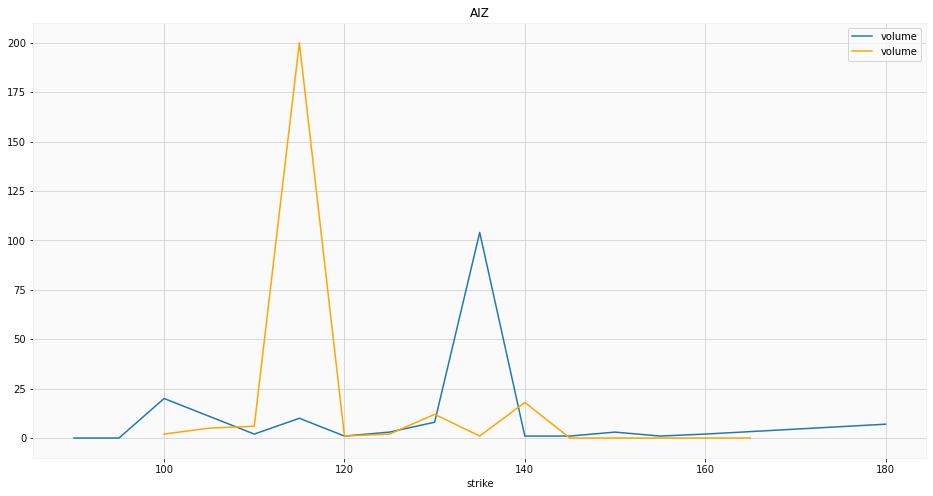

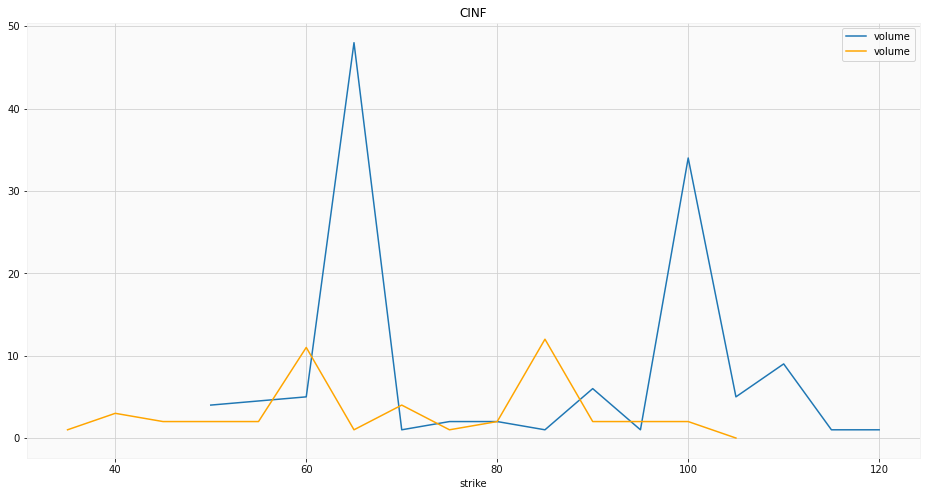

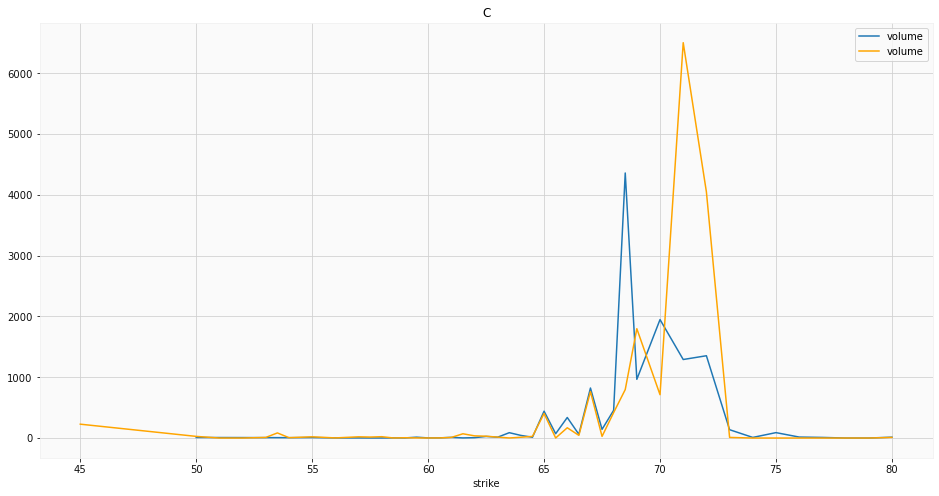

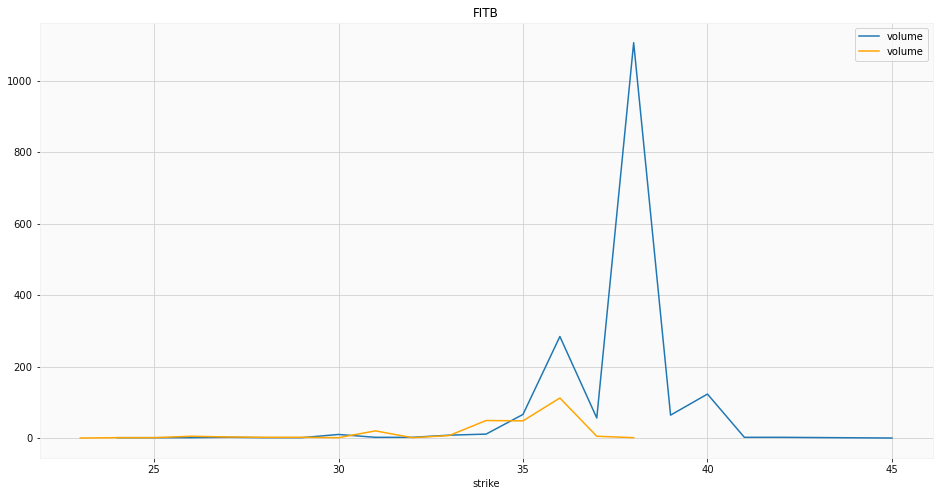

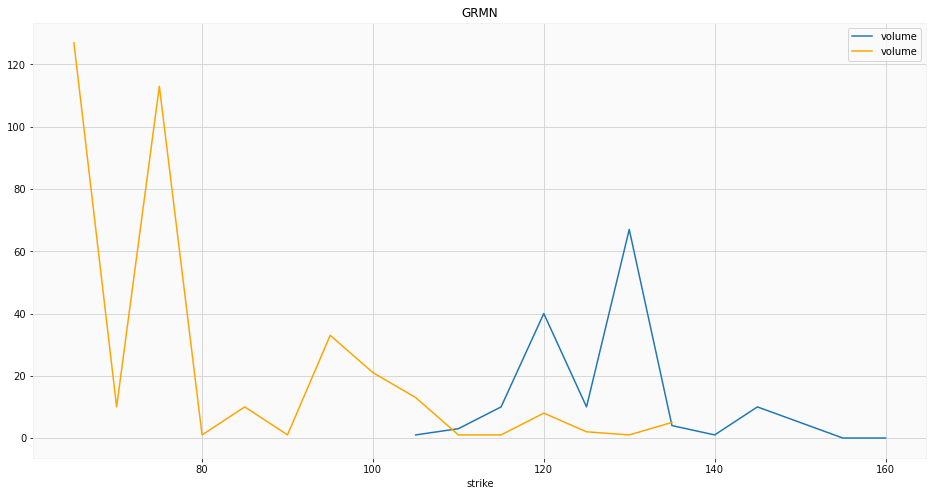

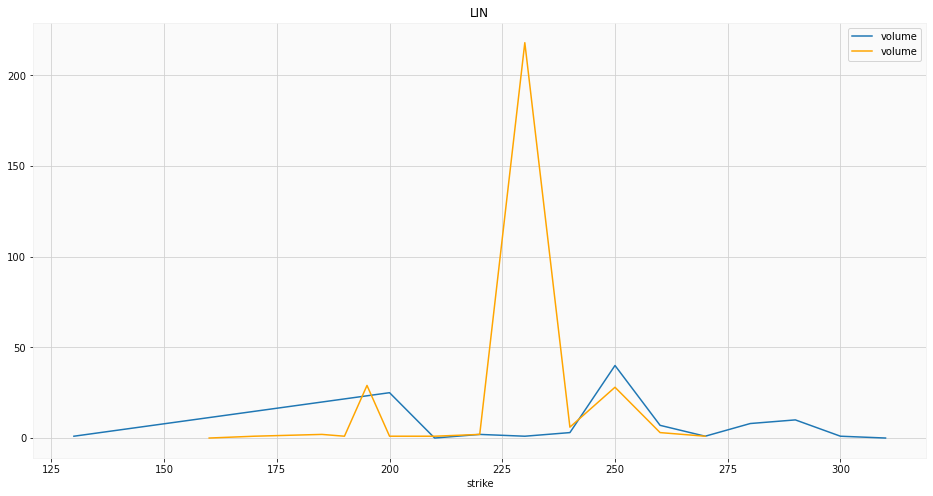

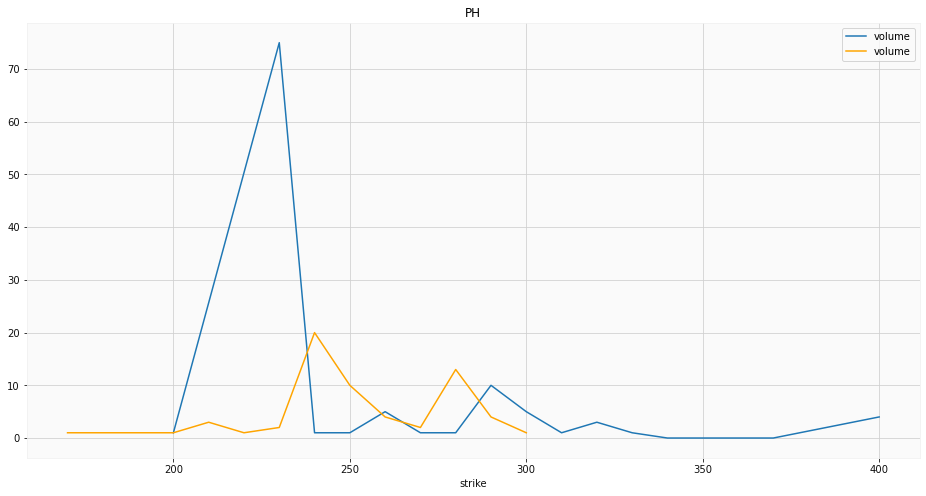

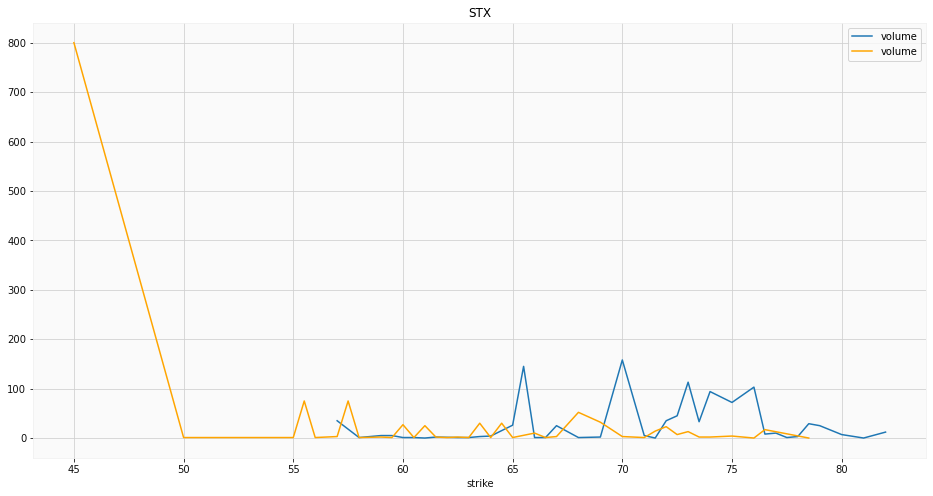

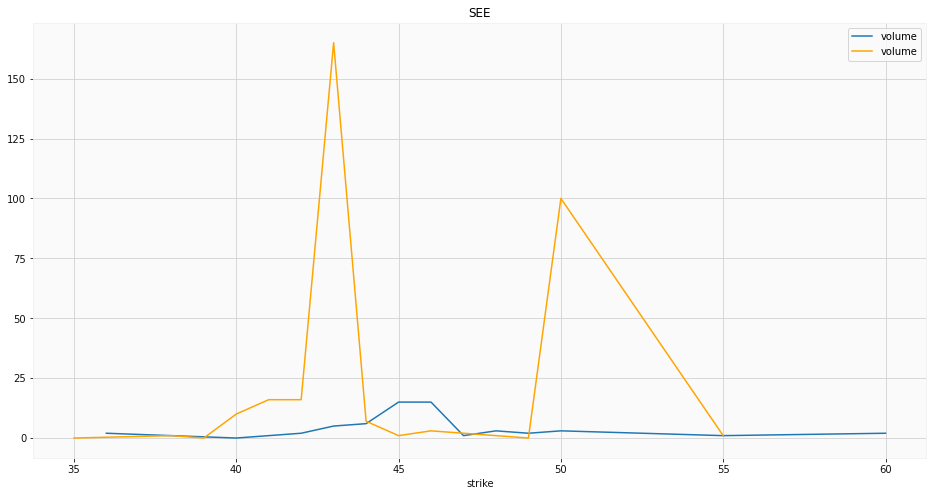

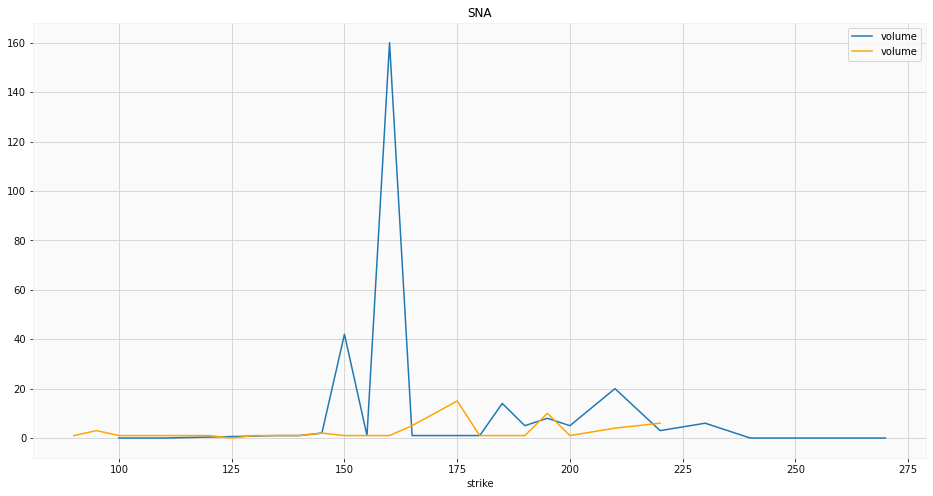

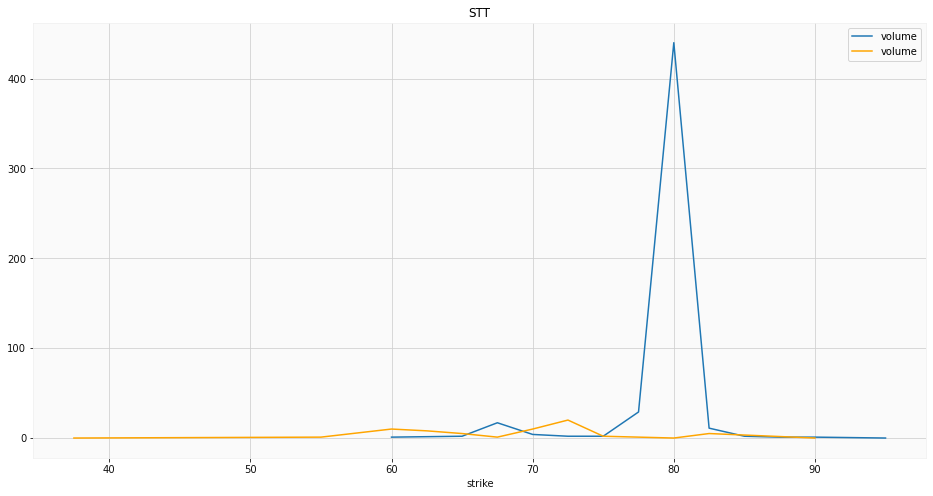

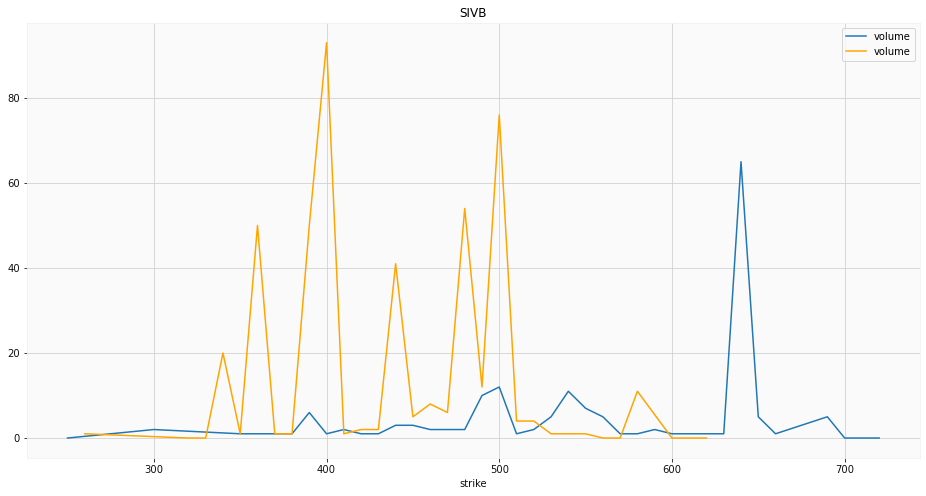

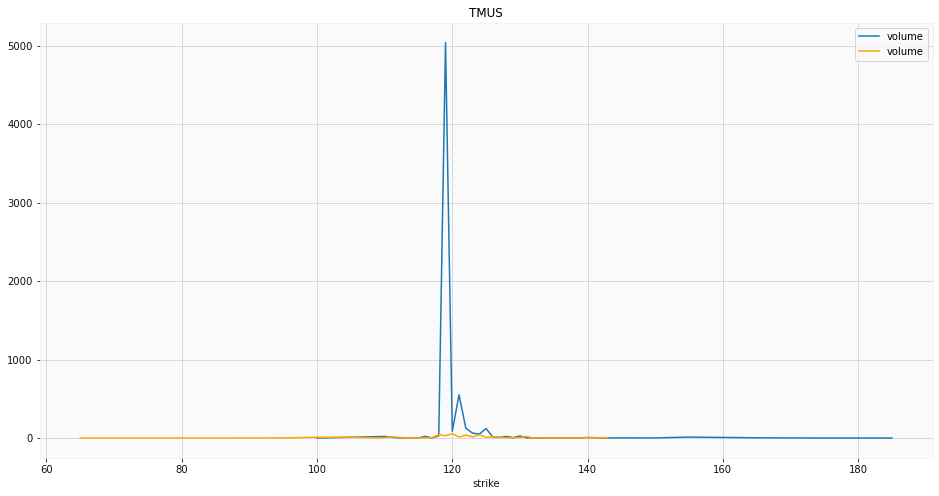

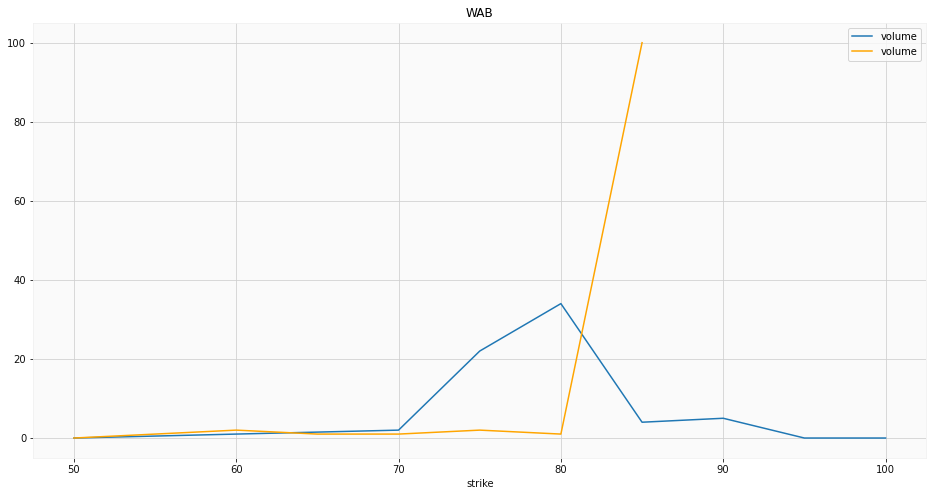

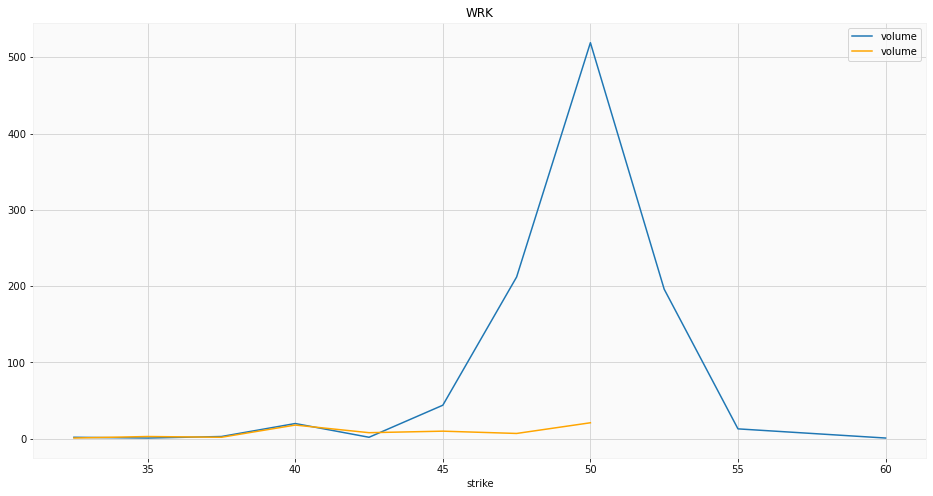

In [158]:
for i in list_morning:
    msft = yf.Ticker(i)
    df_option = msft.option_chain()
    calls = df_option[0].set_index("lastTradeDate")
    puts = df_option[1].set_index("lastTradeDate")
    calls_pivot = pd.pivot_table(calls, index= "strike", values = "volume", aggfunc=np.sum)
    puts_pivot = pd.pivot_table(puts, index= "strike", values = "volume", aggfunc=np.sum)
    ax = calls_pivot.plot(figsize=(16, 8), title = i)
    puts_pivot.plot(ax=ax, color = "orange")

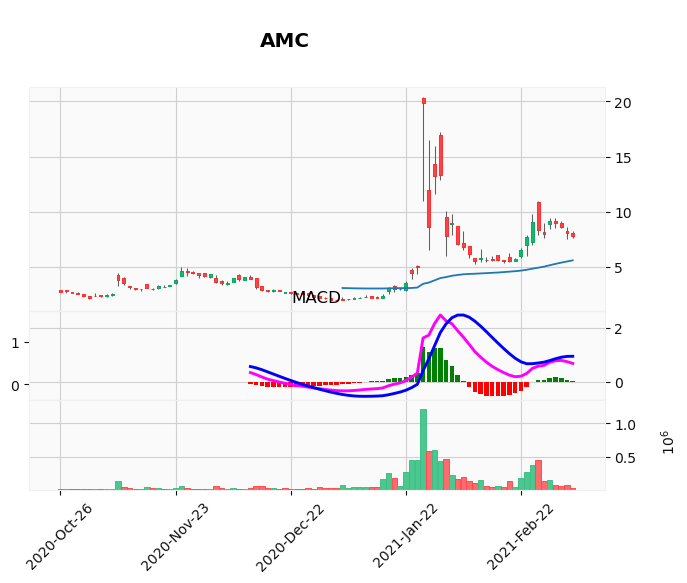

In [53]:
import yfinance as yf
import mplfinance as mpf
import talib as ta

ticker_name = 'AMC'
yticker = yf.Ticker(ticker_name)
data = yticker.history(period="90d") # max, 1y, 3mo

# trim volume to avoid exponential form
data['Volume'] = data['Volume'] / 1000

# macd
data["macd"], data["macd_signal"], data["macd_hist"] = ta.MACD(data['Close'])

# macd panel
colors = ['g' if v >= 0 else 'r' for v in data["macd_hist"]]
macd_plot = mpf.make_addplot(data["macd"], panel=1, color='fuchsia', title="MACD")
macd_hist_plot = mpf.make_addplot(data["macd_hist"], type='bar', panel=1, color=colors) # color='dimgray'
macd_signal_plot = mpf.make_addplot(data["macd_signal"], panel=1, color='b')

# plot
plots = [macd_plot, macd_signal_plot, macd_hist_plot]
mpf.plot(data, type='candle', style='yahoo', mav=(50,100,200), addplot=plots, title=f"\n{ticker_name}", volume=True, volume_panel=2, ylabel='', ylabel_lower='')

In [89]:
msft = yf.Ticker("GME")
df_option = msft.option_chain()

In [119]:
calls = df_option[0].set_index("lastTradeDate")
puts = df_option[1].set_index("lastTradeDate")

In [129]:
calls_pivot = pd.pivot_table(calls, index= "strike", values = "volume", aggfunc=np.sum)
puts_pivot = pd.pivot_table(puts, index= "strike", values = "volume", aggfunc=np.sum)

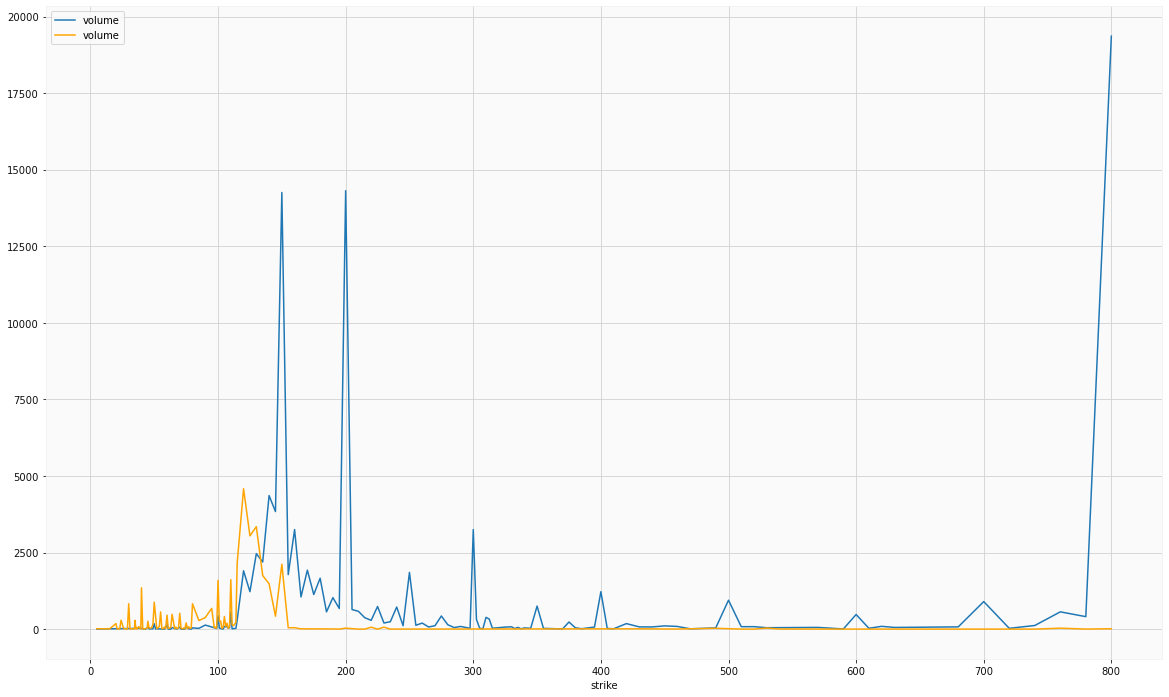

In [152]:
ax = calls_pivot.plot(figsize=(20,12))
puts_pivot.plot(ax=ax, color = "orange")

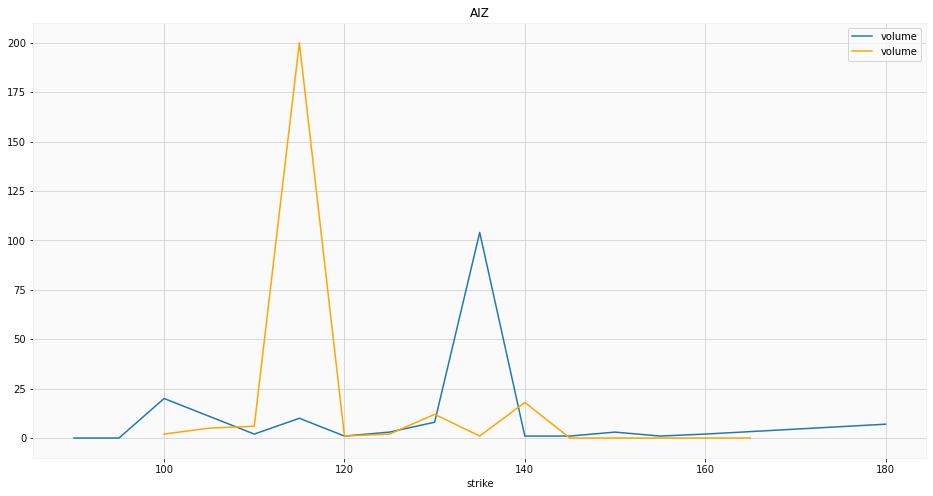

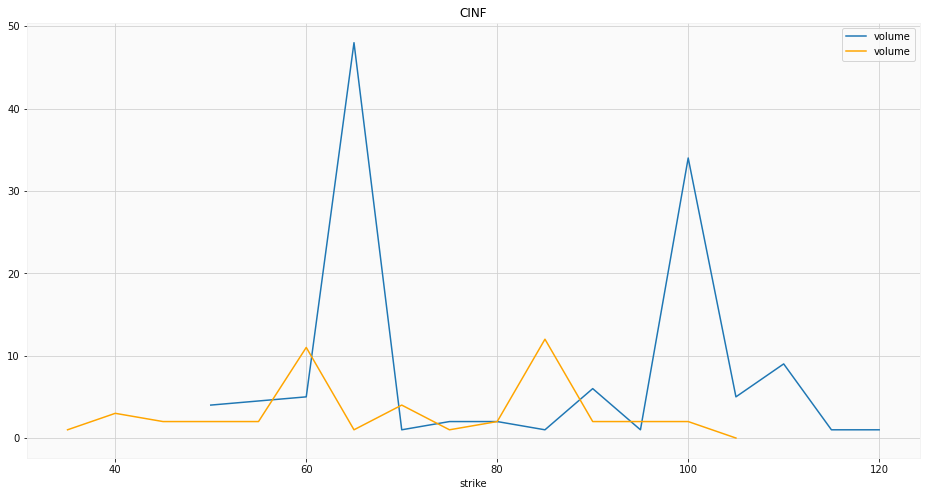

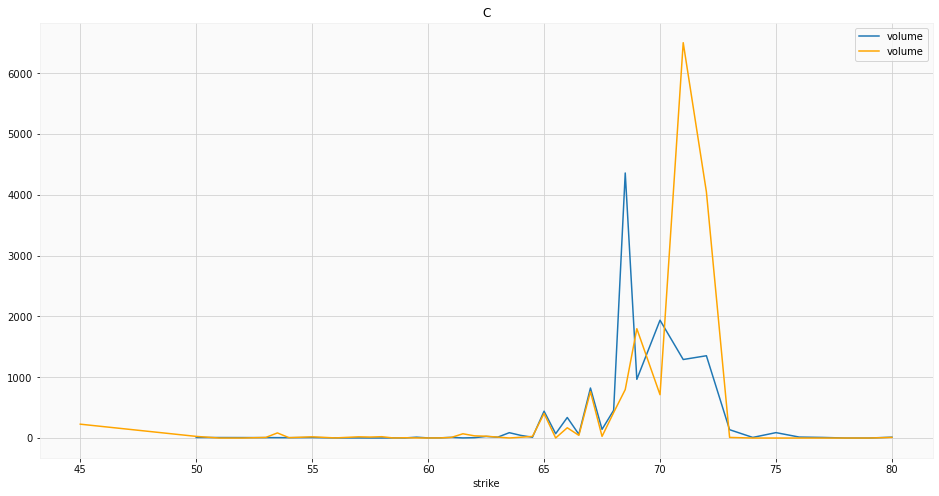

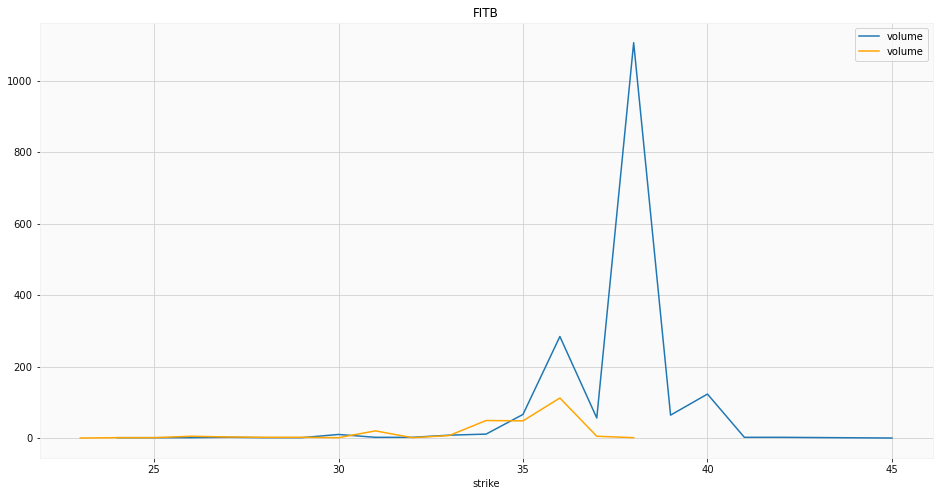

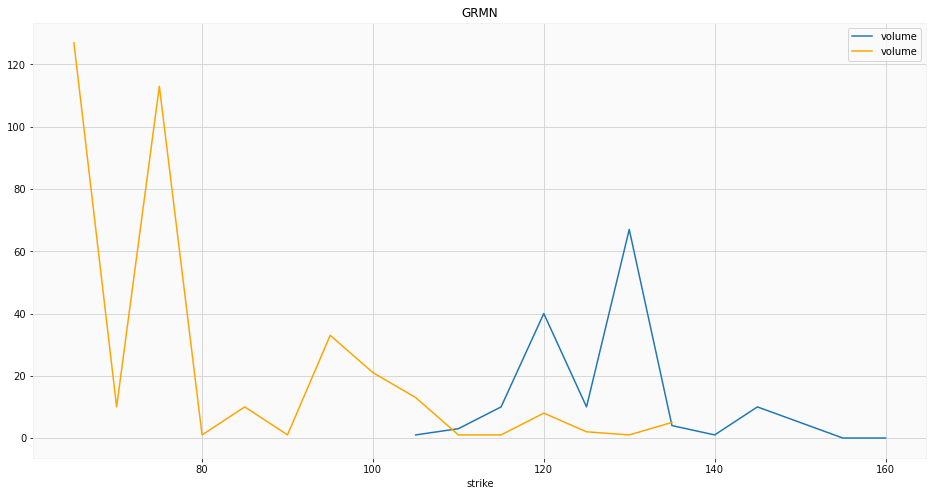

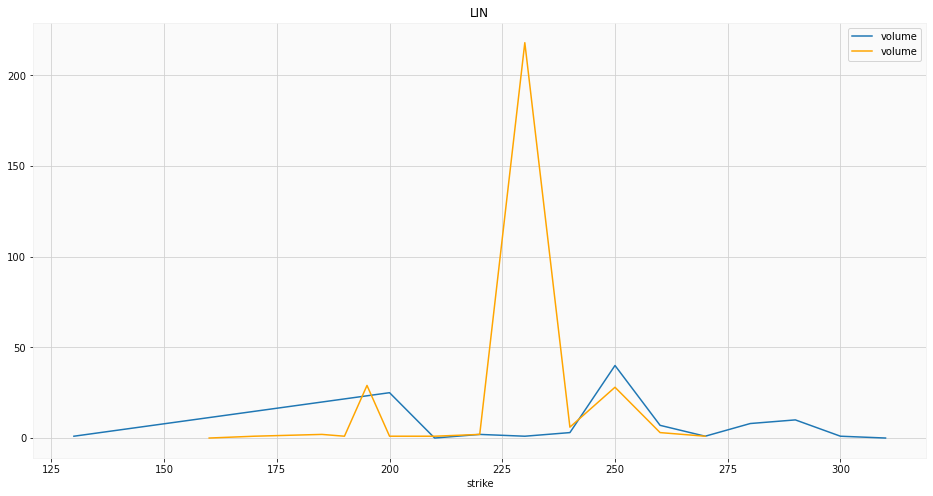

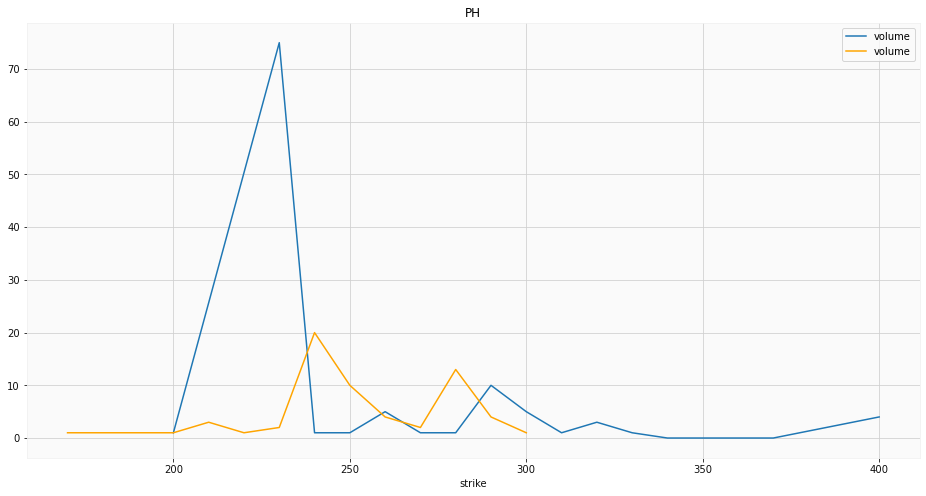

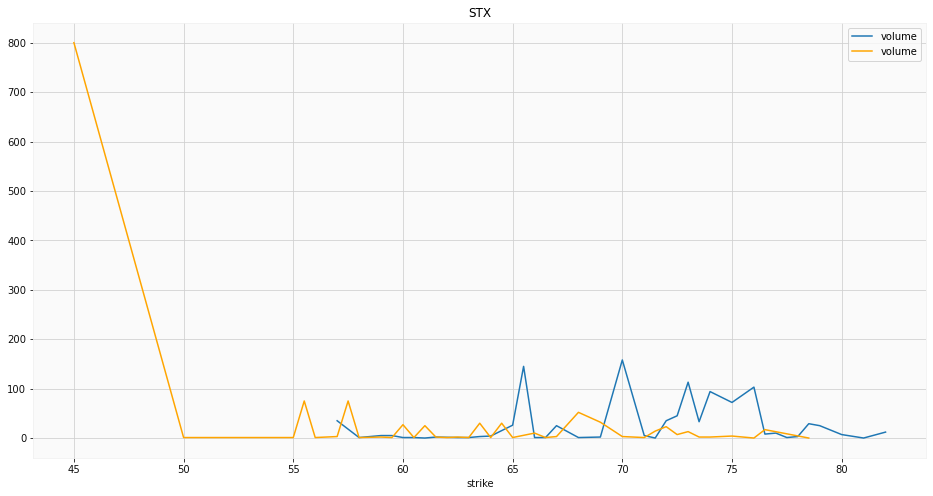

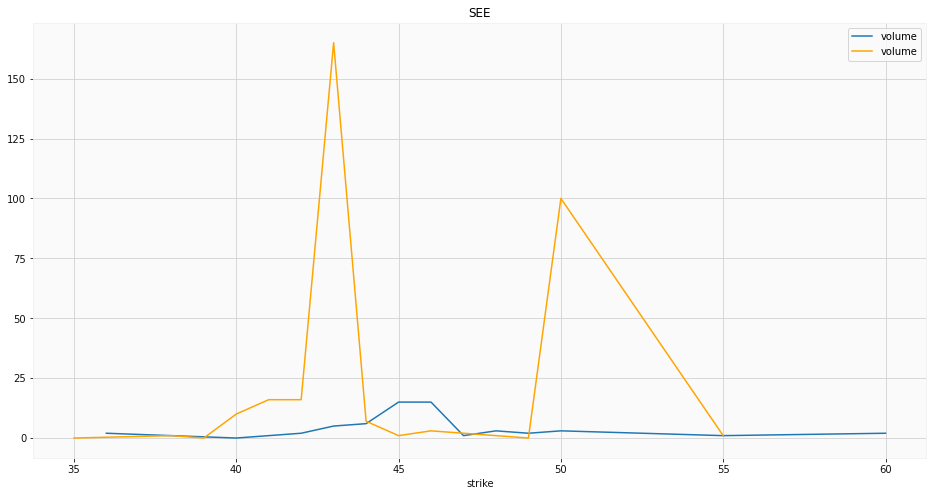

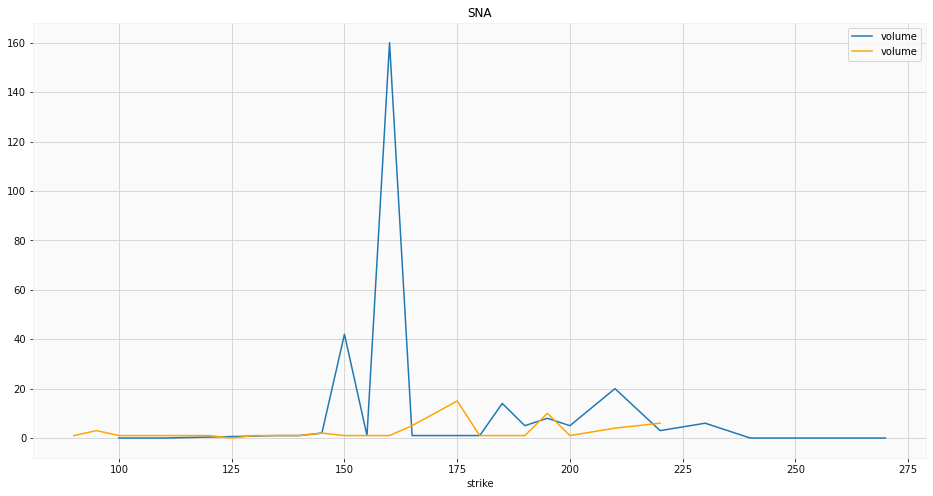

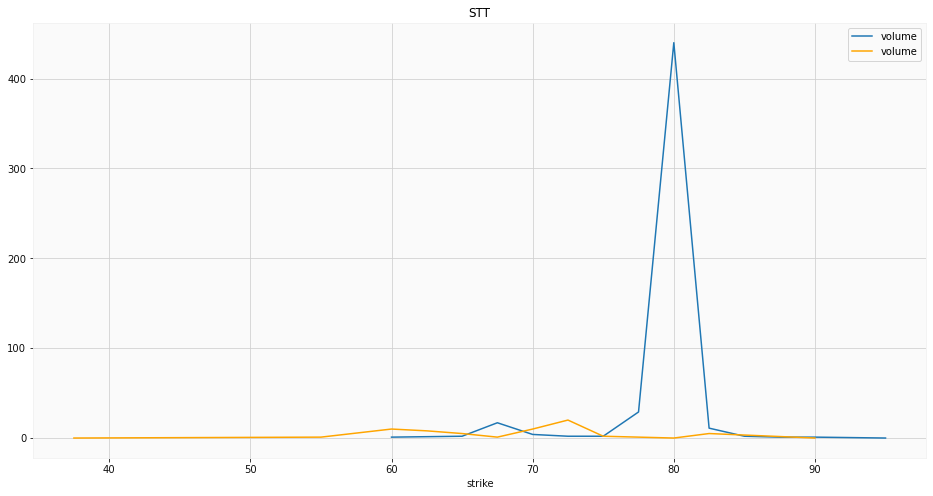

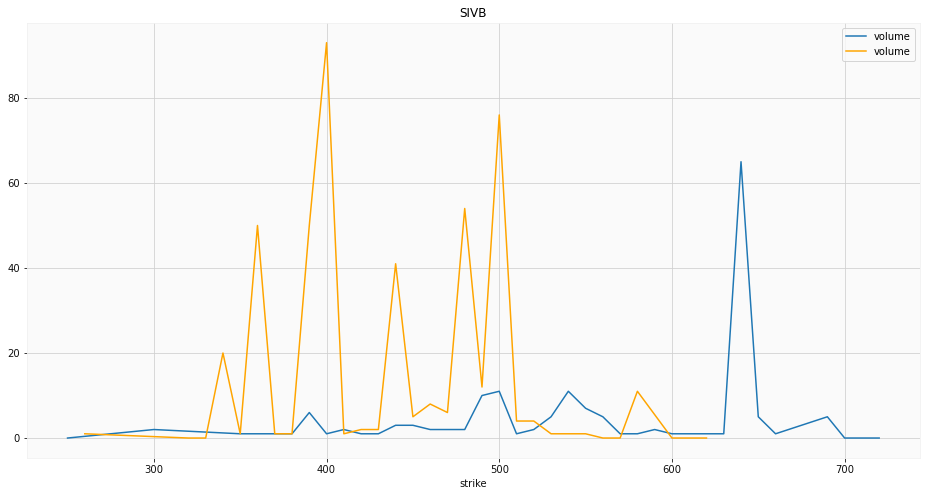

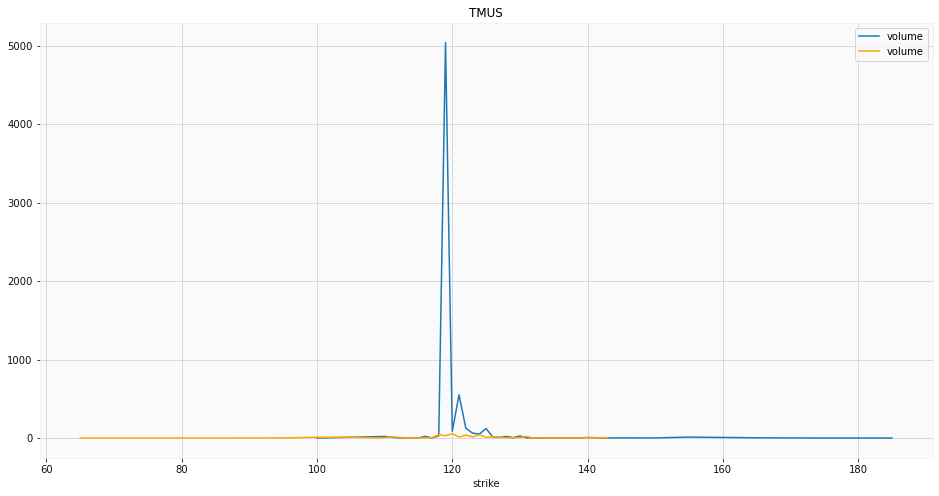

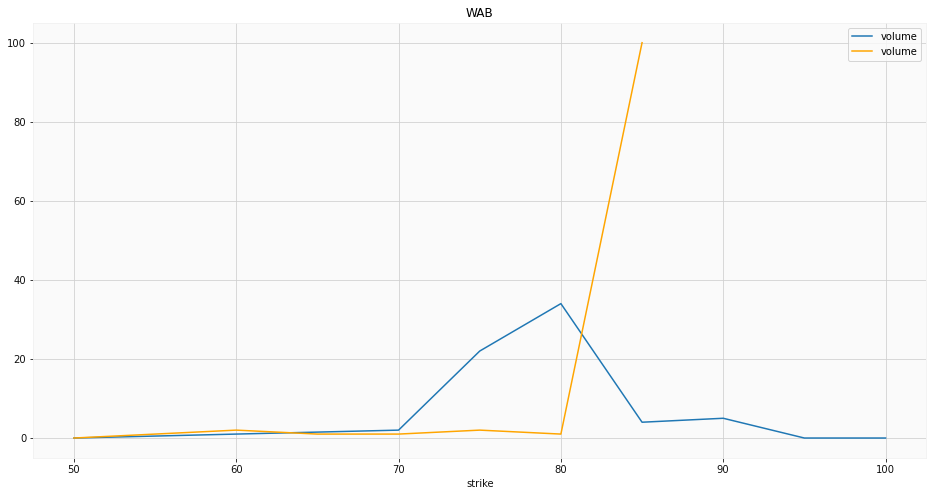

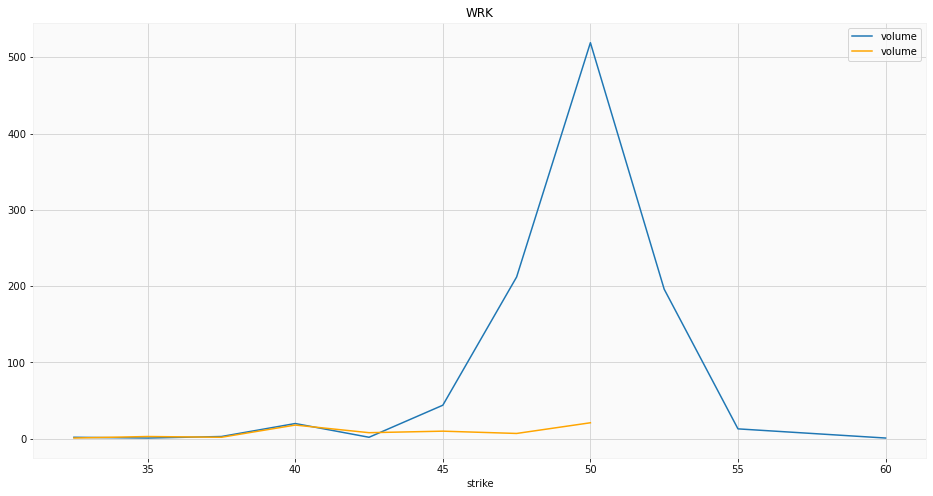